The purpose of this notebook is to see how data from Volvo looks like

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from copy import deepcopy
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [2]:
pickles = {}
for set_num in ['369', '370', '371', '372', '375']:
    pickles['data-'+set_num] = np.load('../data/mixed/volvo-buses/data-'+ set_num +'.pickle',  allow_pickle=True)
    print(set_num, ' loaded')
    
    # break point for not loading all data at once (unefficient) 
    # break

369  loaded
370  loaded
371  loaded
372  loaded
375  loaded


In [3]:
data = pickles['data-369']
data

,Timestamp,WetTankAirPressure,LongitudAcc,EngineSpeed,Fuel Rate,Engine Load,Boost Pressure,EngineAirInletPressure,AcceleratorPedalPos,VehicleSpeed,BrakePedalPos
0,2.627645e+10,4.27490,0.0,0.000,0.000000,0.0,0.000000,100.0,0.0,0.000000,0.0
1,2.627645e+10,4.27490,0.0,0.000,0.000000,0.0,0.000000,100.0,0.0,0.000000,0.0
2,2.627645e+10,4.27490,0.0,0.000,0.000000,0.0,0.000000,100.0,0.0,0.000000,0.0
3,2.627645e+10,4.27490,0.0,0.000,0.000000,0.0,0.000000,100.0,0.0,0.000000,0.0
4,2.627645e+10,4.27490,0.0,0.000,0.000000,0.0,0.000000,100.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...
10908295,8.299465e+10,11.65255,-0.2,596.500,4.081143,24.0,0.008618,102.0,0.0,2.331882,0.0
10908296,8.299465e+10,11.58360,-0.4,616.750,3.430526,19.5,0.000000,102.0,0.0,1.796760,11.2
10908297,8.299465e+10,11.51465,0.0,573.000,3.726261,20.5,0.000000,102.0,0.0,0.000000,18.4
10908298,8.299465e+10,11.44570,0.0,617.500,3.726261,20.0,0.000000,102.0,0.0,0.000000,0.0


In [4]:
# print(type(data))
# import pandas_profiling
# profile = data.profile_report()
# profile.to_file("report.html")

In [5]:
VACT_EPOCH = datetime.datetime(year=2011,month=6,day=16,hour=5,minute=23,second=0)
def getDate(value):
    return VACT_EPOCH + datetime.timedelta(milliseconds=int(value))

data.Timestamp = data.Timestamp.apply(getDate)
data.Timestamp

0          2012-04-15 08:23:47.763
1          2012-04-15 08:23:48.457
2          2012-04-15 08:23:49.550
3          2012-04-15 08:23:50.715
4          2012-04-15 08:23:51.435
                     ...          
10908295   2014-01-31 19:27:06.824
10908296   2014-01-31 19:27:07.994
10908297   2014-01-31 19:27:08.672
10908298   2014-01-31 19:27:09.790
10908299   2014-01-31 19:27:10.884
Name: Timestamp, Length: 10908300, dtype: datetime64[ns]

Service: 02/07/2012 for 369. 370 seems normal(?). For 371 this period seems weird, but I'm not sure about anomaly. 372, 375 - this period is not in time range of this bus. 

In [6]:
# for col in data.columns:
#     if col == 'Timestamp':
#         continue
#     else:
#         partial_data = data.loc[(data['Timestamp'] >= datetime.datetime(year=2012,month=6,day=20,hour=0,minute=0,second=1))
#               & (data['Timestamp'] <= datetime.datetime(year=2012,month=7,day=20,hour=0,minute=0,second=1))]

#         f = plt.figure(figsize=(50, 15))
#         plt.plot(partial_data['Timestamp'], partial_data[col])
#         plt.title(col)
#         plt.axvspan(datetime.datetime(year=2012,month=7,day=2,hour=0,minute=0,second=1), datetime.datetime(year=2012,month=7,day=8,hour=0,minute=0,second=1), color='red', alpha=0.5)
#         plt.show()


Just for the sake of comparison:

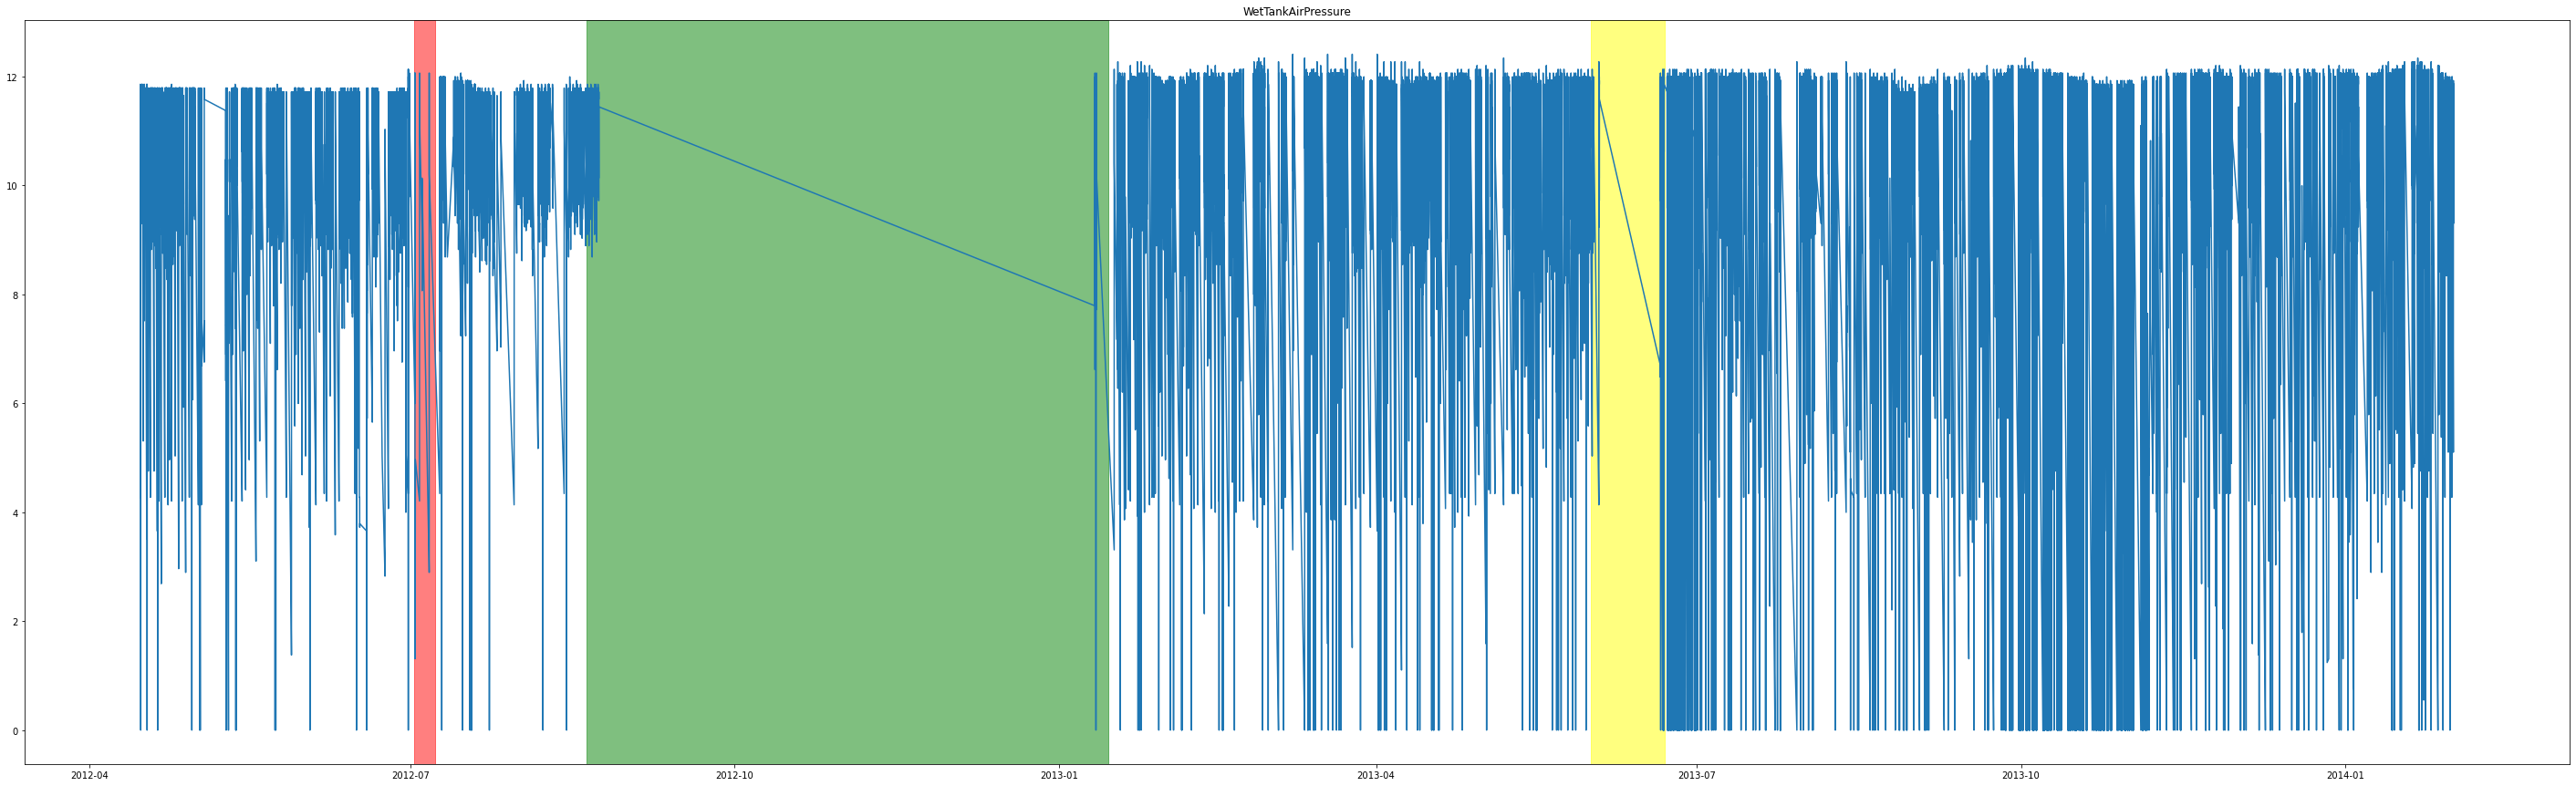

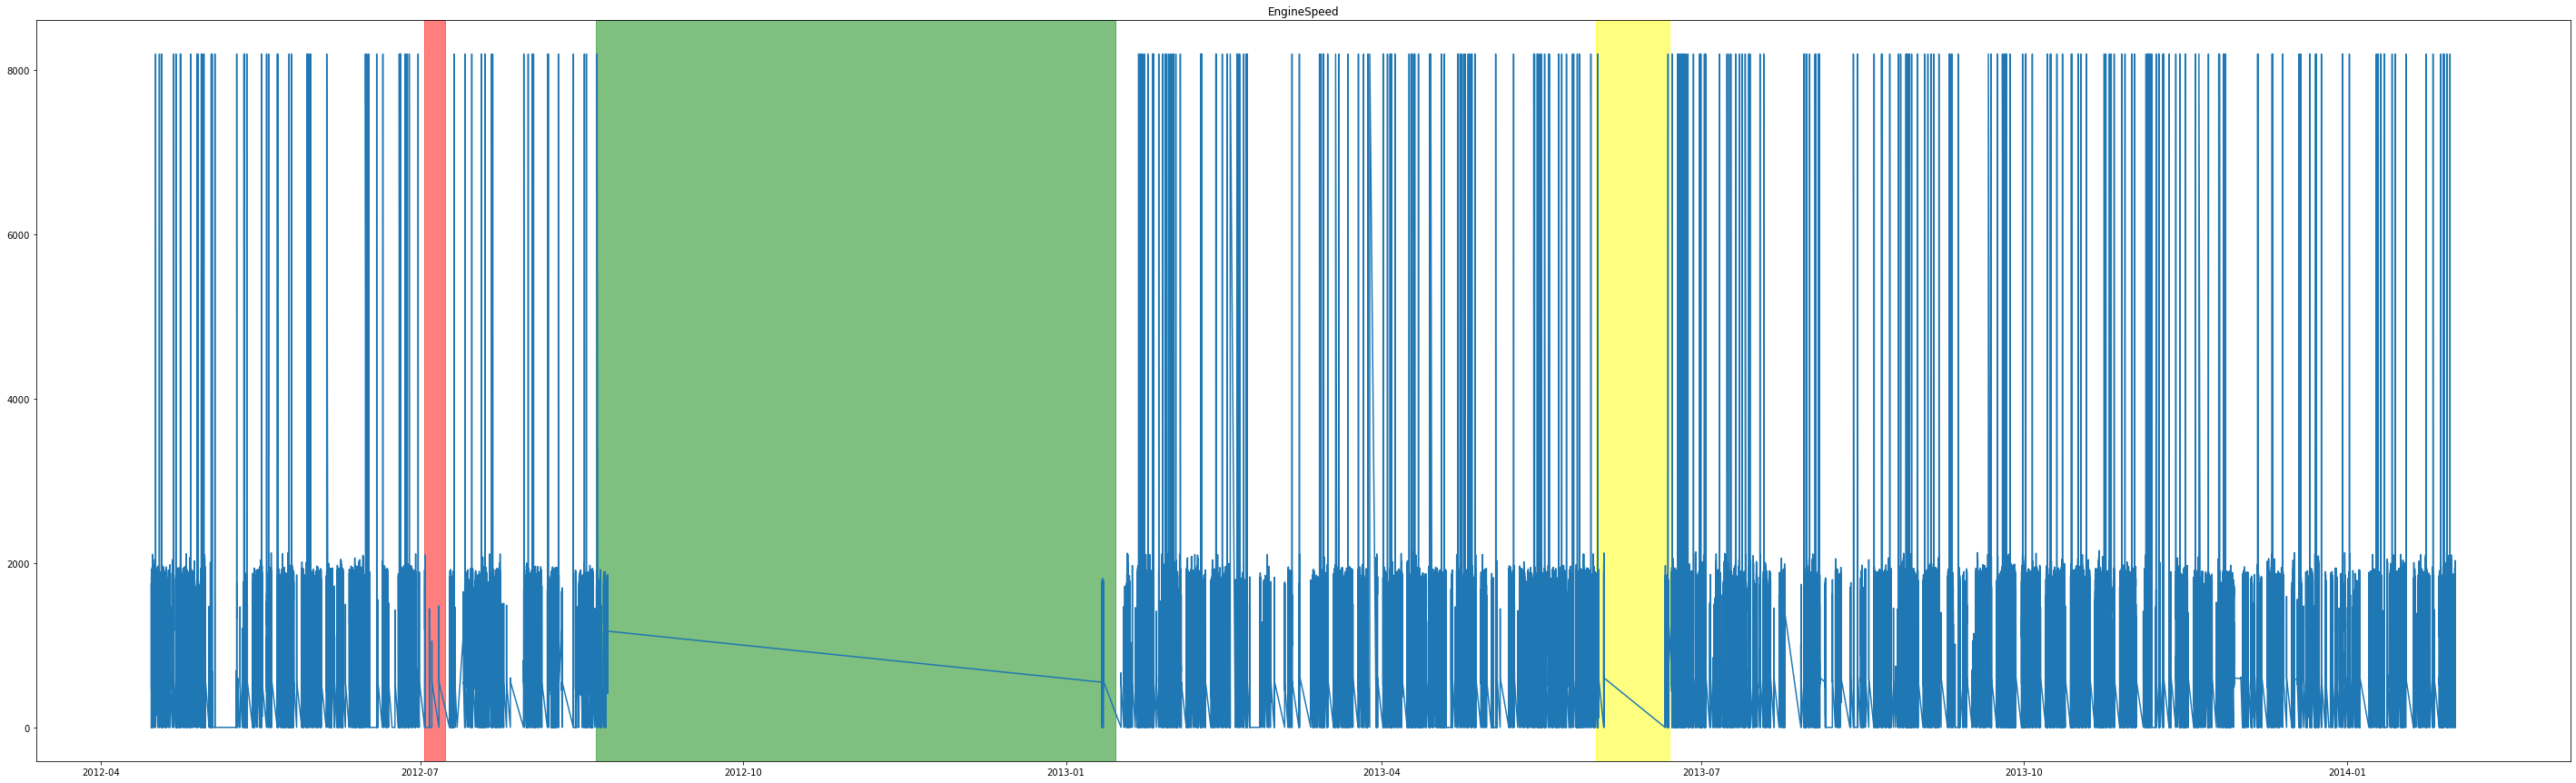

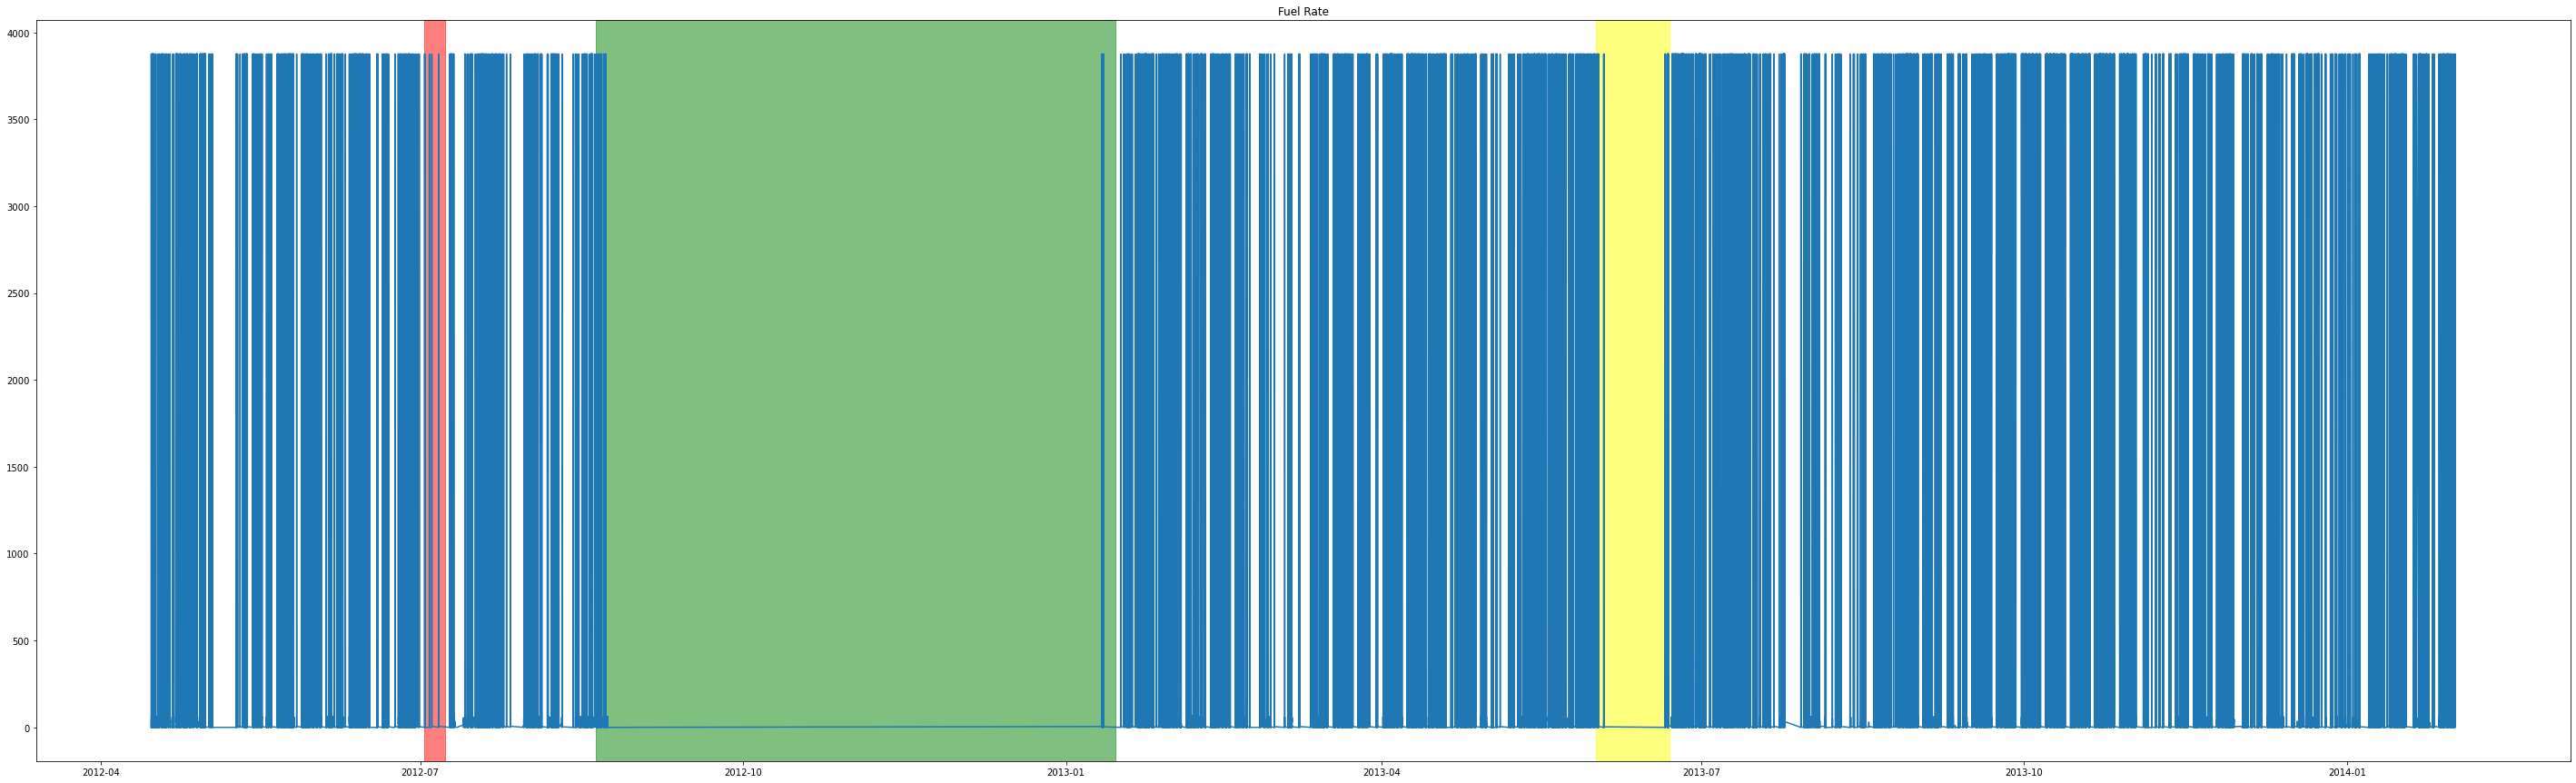

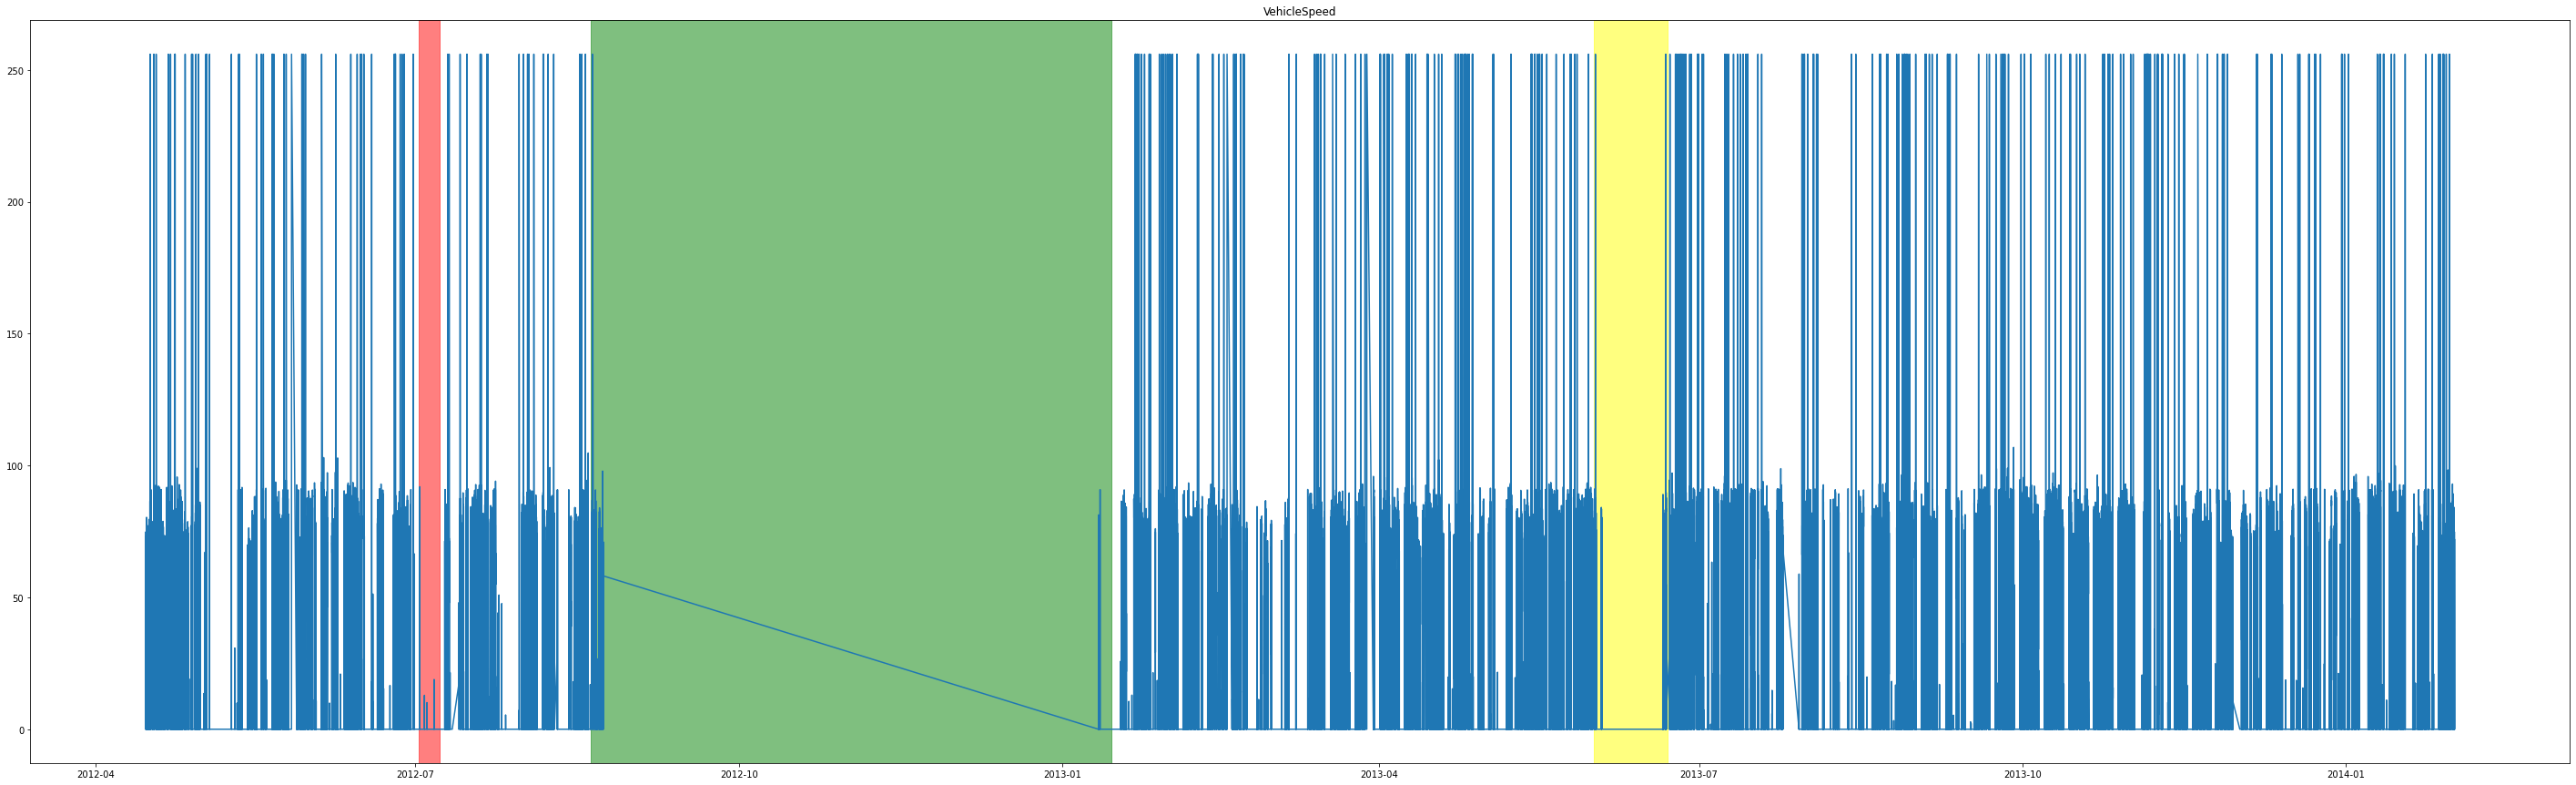

In [7]:
cols_to_check = ['WetTankAirPressure', 'EngineSpeed', 'Fuel Rate', 'VehicleSpeed']
for col in cols_to_check:
    f = plt.figure(figsize=(50, 15))
    plt.plot(data['Timestamp'], data[col])
    plt.title(col)
    plt.axvspan(datetime.datetime(year=2012,month=7,day=2,hour=0,minute=0,second=1), datetime.datetime(year=2012,month=7,day=8,hour=0,minute=0,second=1), color='red', alpha=0.5)
    plt.axvspan(datetime.datetime(year=2012,month=8,day=20,hour=0,minute=0,second=1), datetime.datetime(year=2013,month=1,day=15,hour=0,minute=0,second=1), color='green', alpha=0.5)
    plt.axvspan(datetime.datetime(year=2013,month=6,day=1,hour=0,minute=0,second=1), datetime.datetime(year=2013,month=6,day=22,hour=0,minute=0,second=1), color='yellow', alpha=0.5)
    plt.show()

# More buses

In [8]:
import plotly.graph_objects as go

import pandas as pd

In [9]:
# # Load data
# # for set_name in pickles.keys():
# # df = pickles[set_name]
# df = data
# # Create figure
# fig = go.Figure()

# try:
#     df.Timestamp = df.Timestamp.apply(getDate)
# except:
#     pass
# df.Timestamp
# fig.add_trace(
#     go.Scatter(x=list(df.Timestamp), y=list(df.WetTankAirPressure)))

# # Set title
# fig.update_layout(
#     title_text="WetTankAirPressure for bus 369"
# )

# # Add range slider
# fig.update_layout(
#     xaxis=dict(
#         rangeselector=dict(
#             buttons=list([
#                 dict(count=1,
#                     label="1m",
#                     step="month",
#                     stepmode="backward"),
#                 dict(count=6,
#                     label="6m",
#                     step="month",
#                     stepmode="backward"),
#                 dict(count=1,
#                     label="YTD",
#                     step="year",
#                     stepmode="todate"),
#                 dict(count=1,
#                     label="1y",
#                     step="year",
#                     stepmode="backward"),
#                 dict(step="all")
#             ])
#         ),
#         rangeslider=dict(
#             visible=True
#         ),
#         type="date"
#     )
# )

# fig.show()

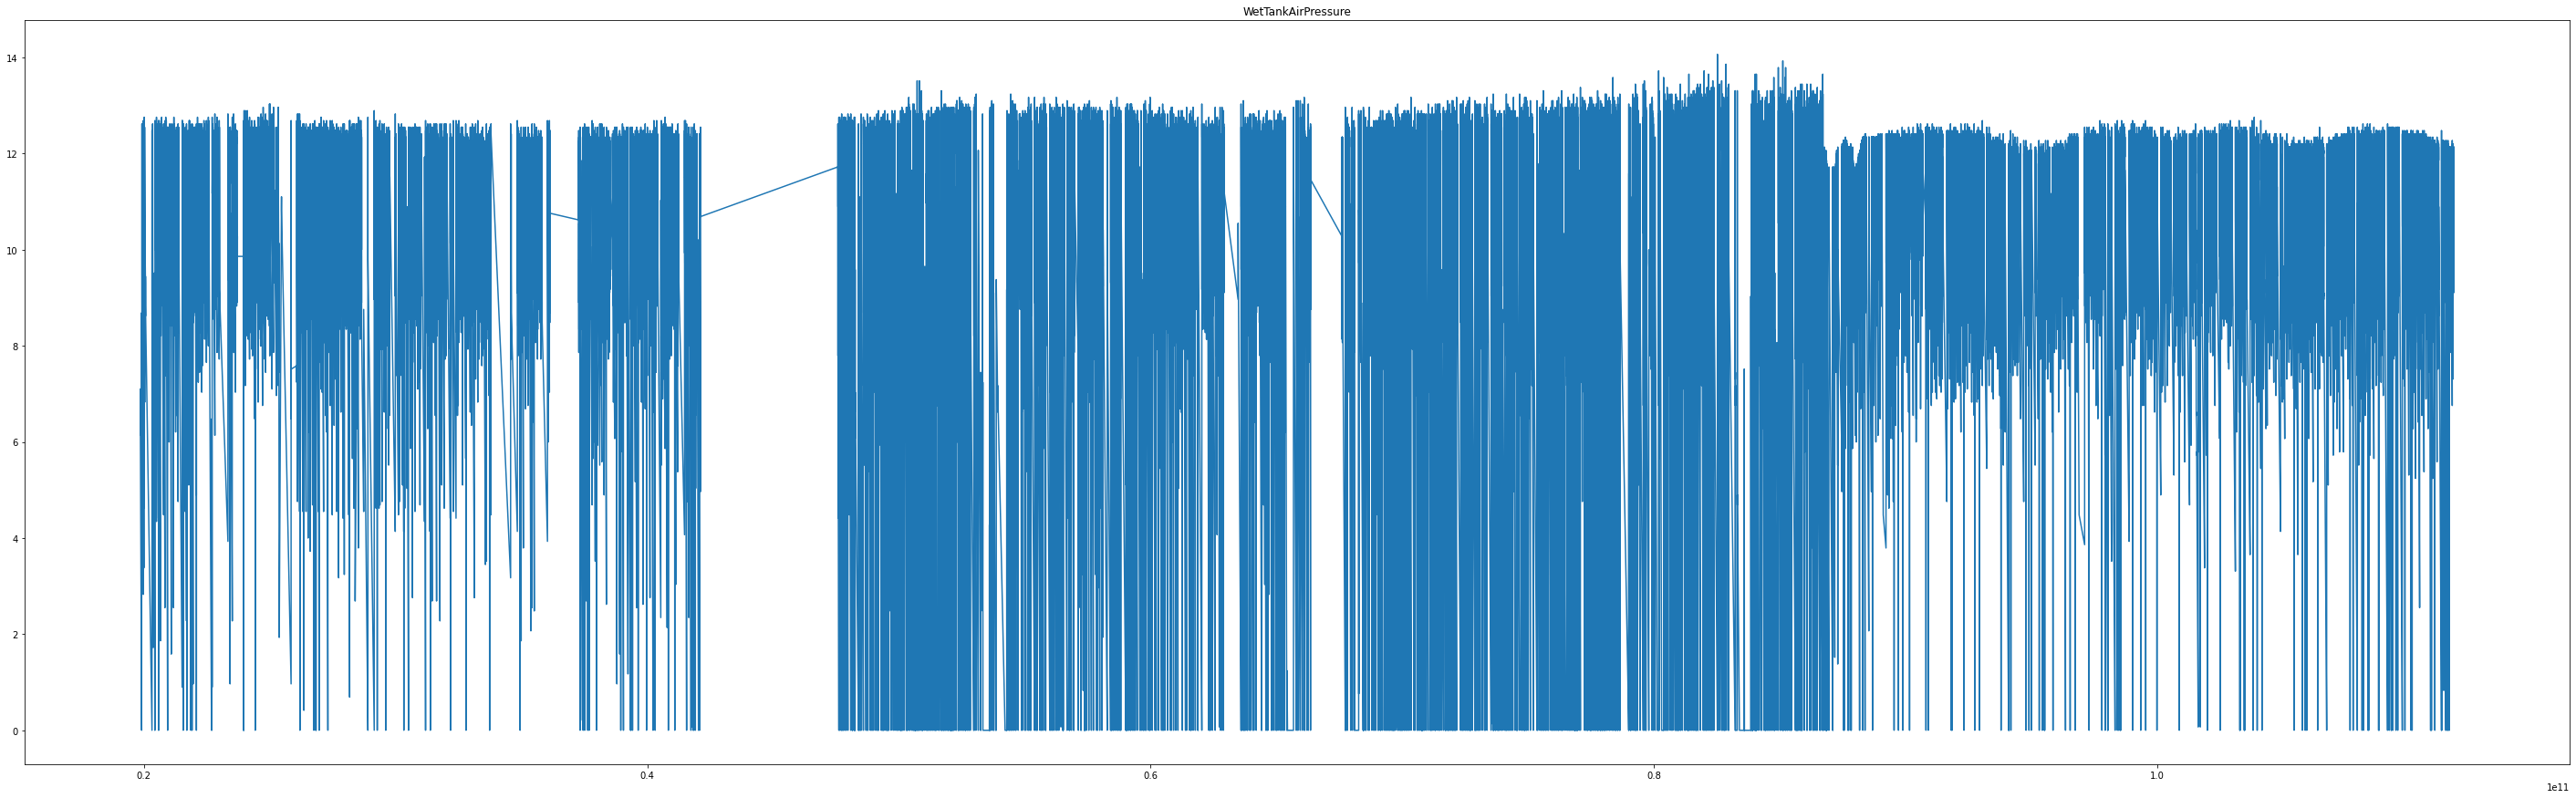

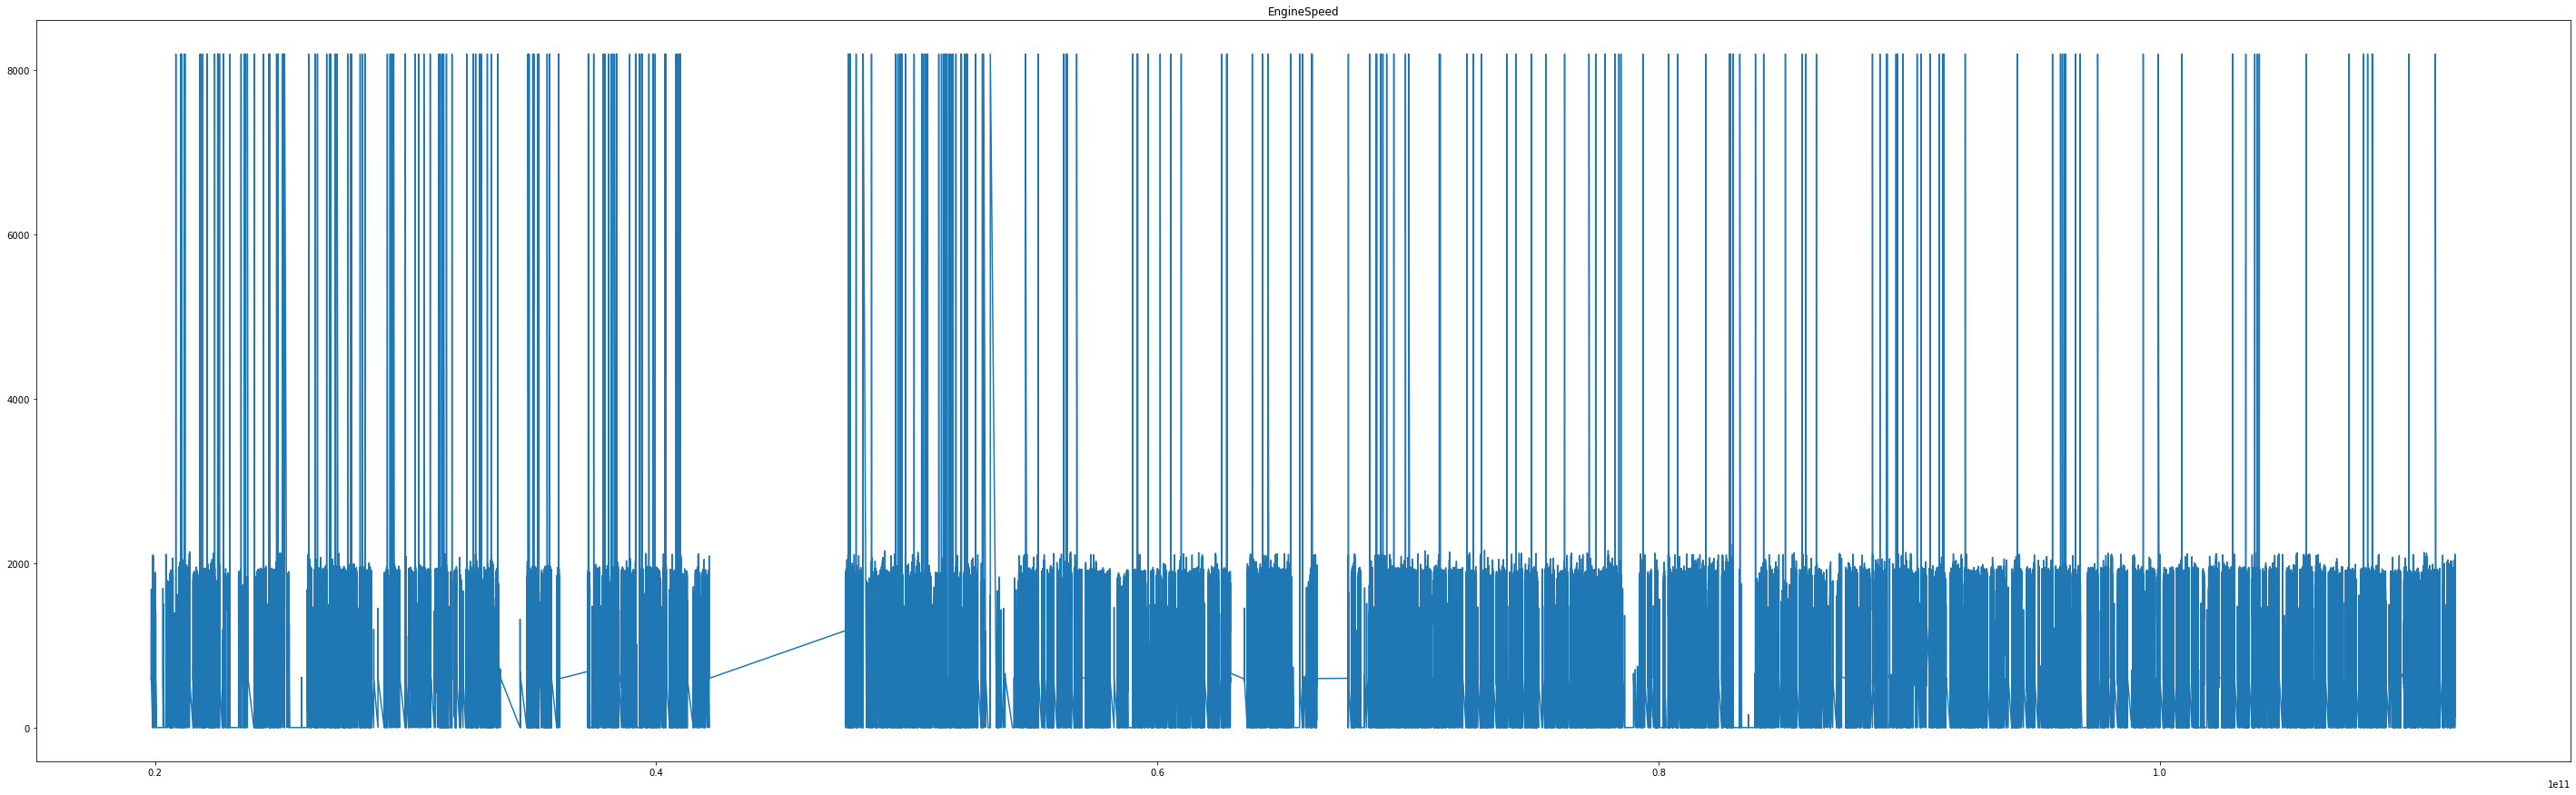

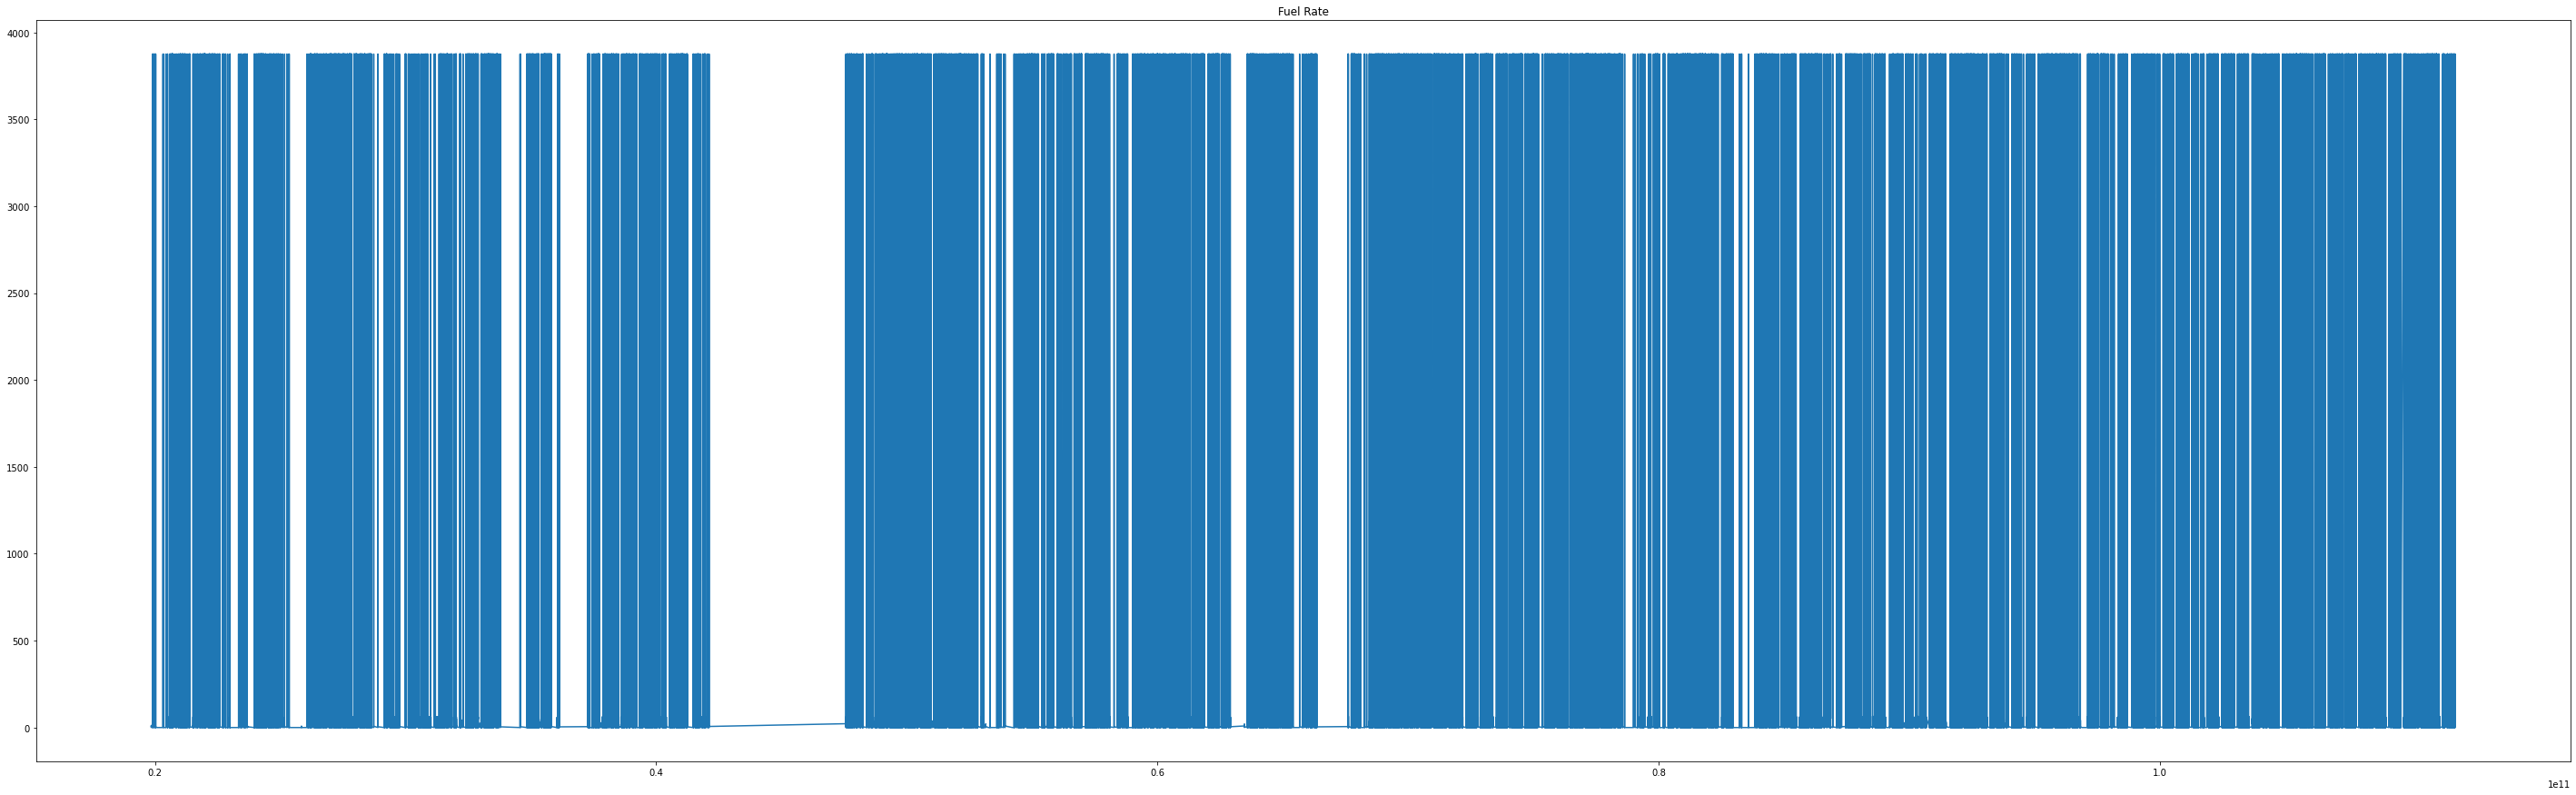

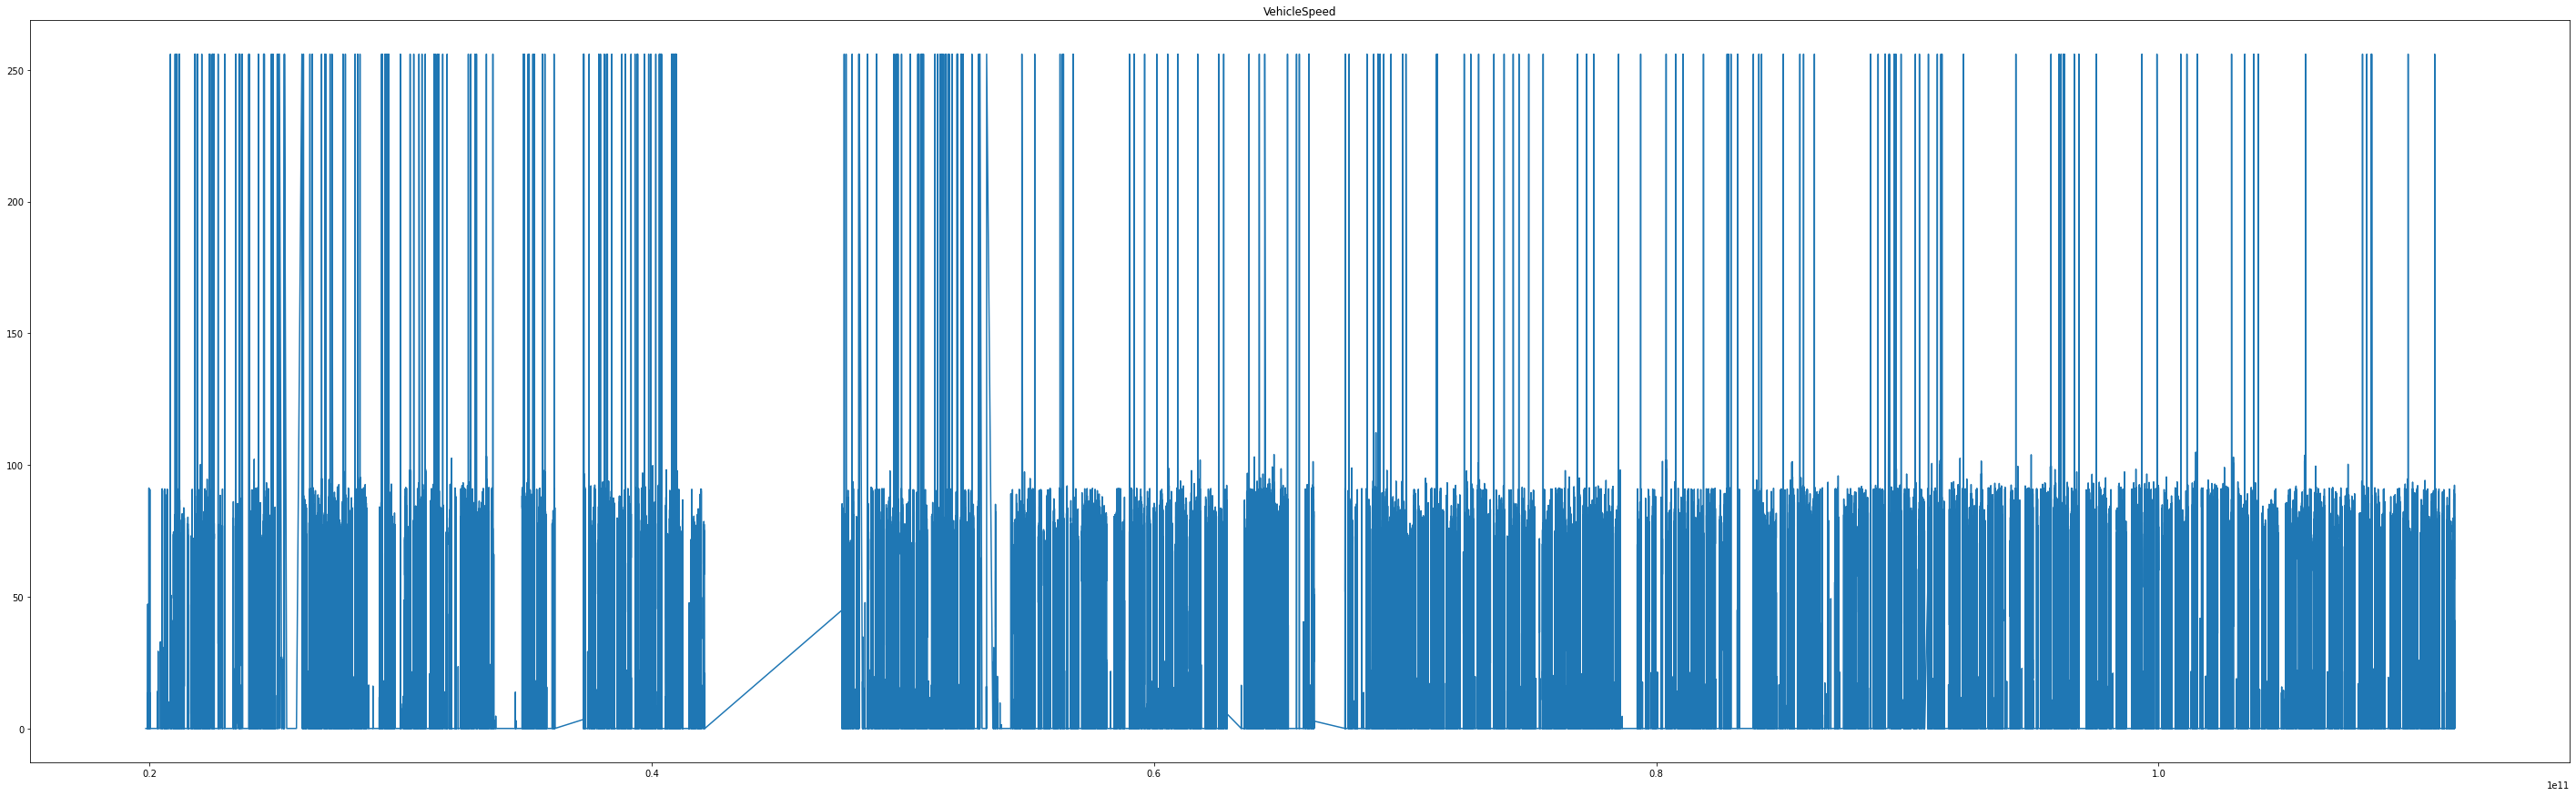

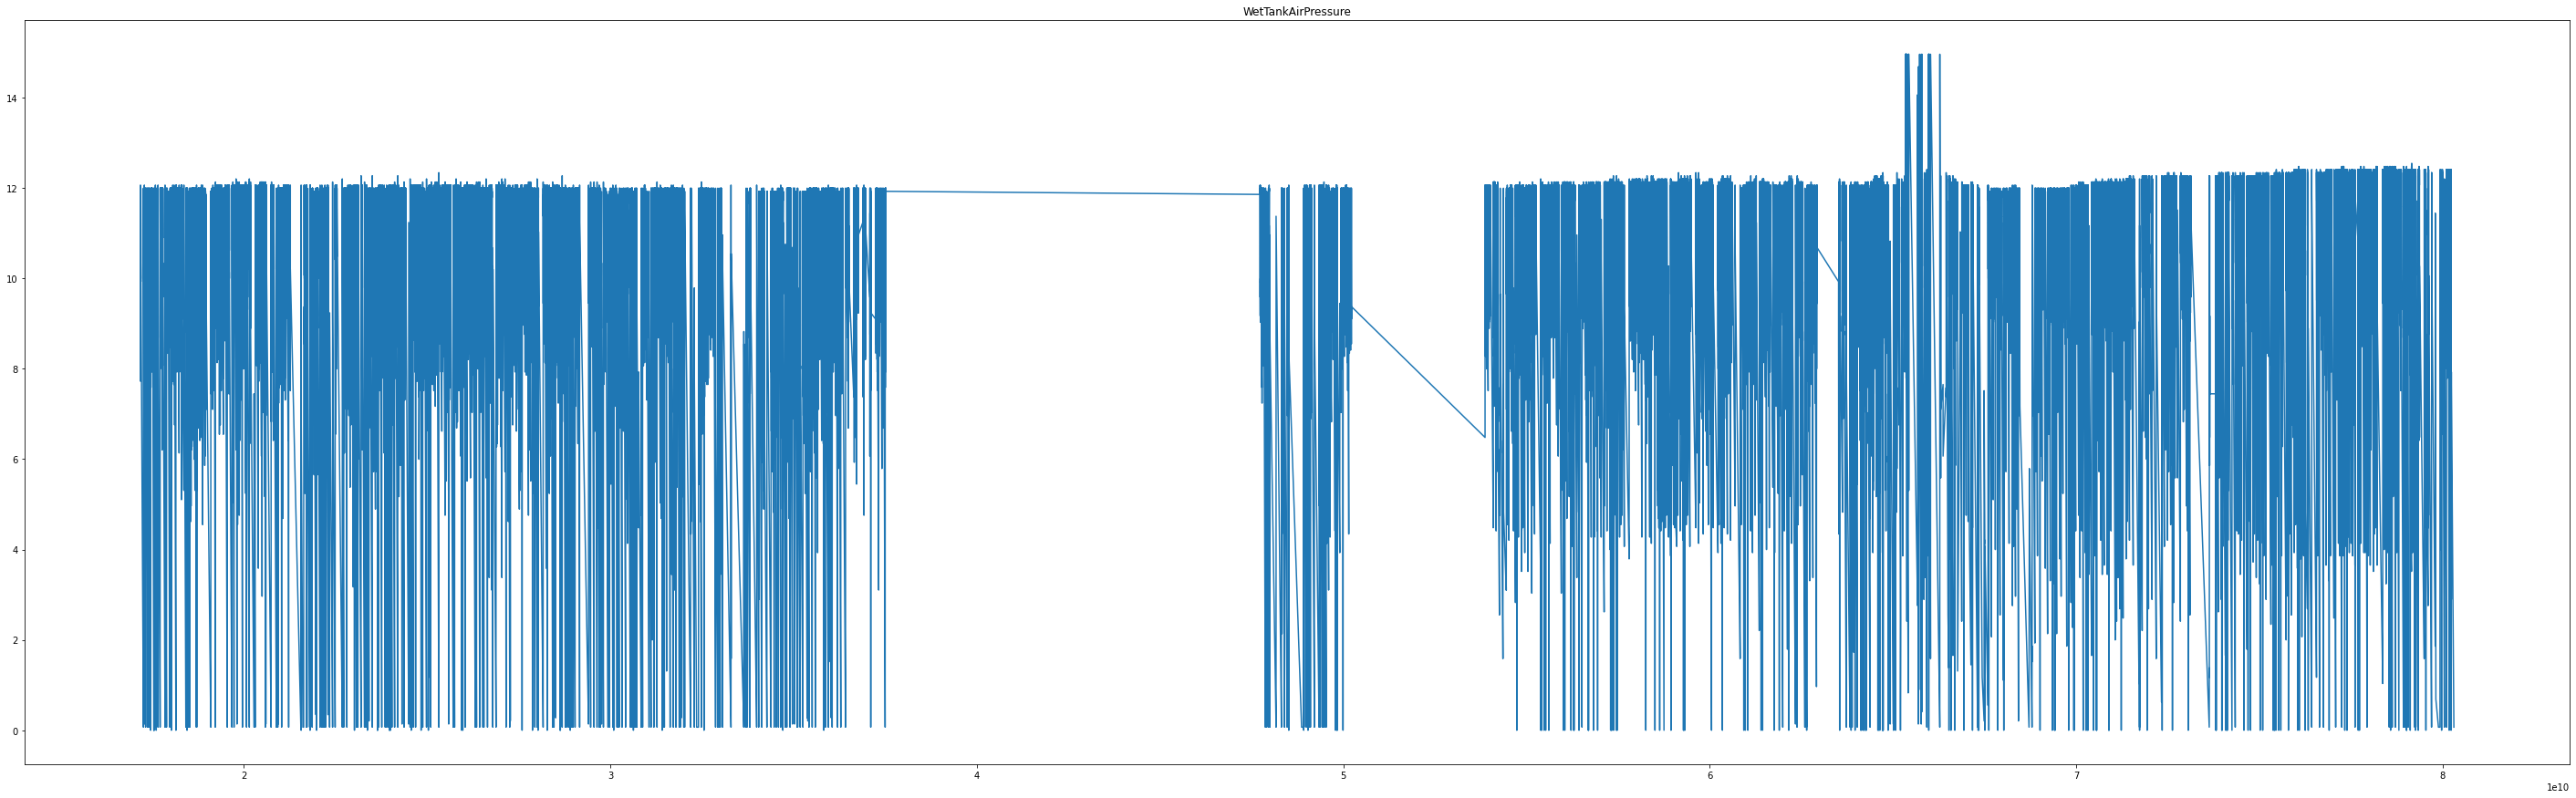

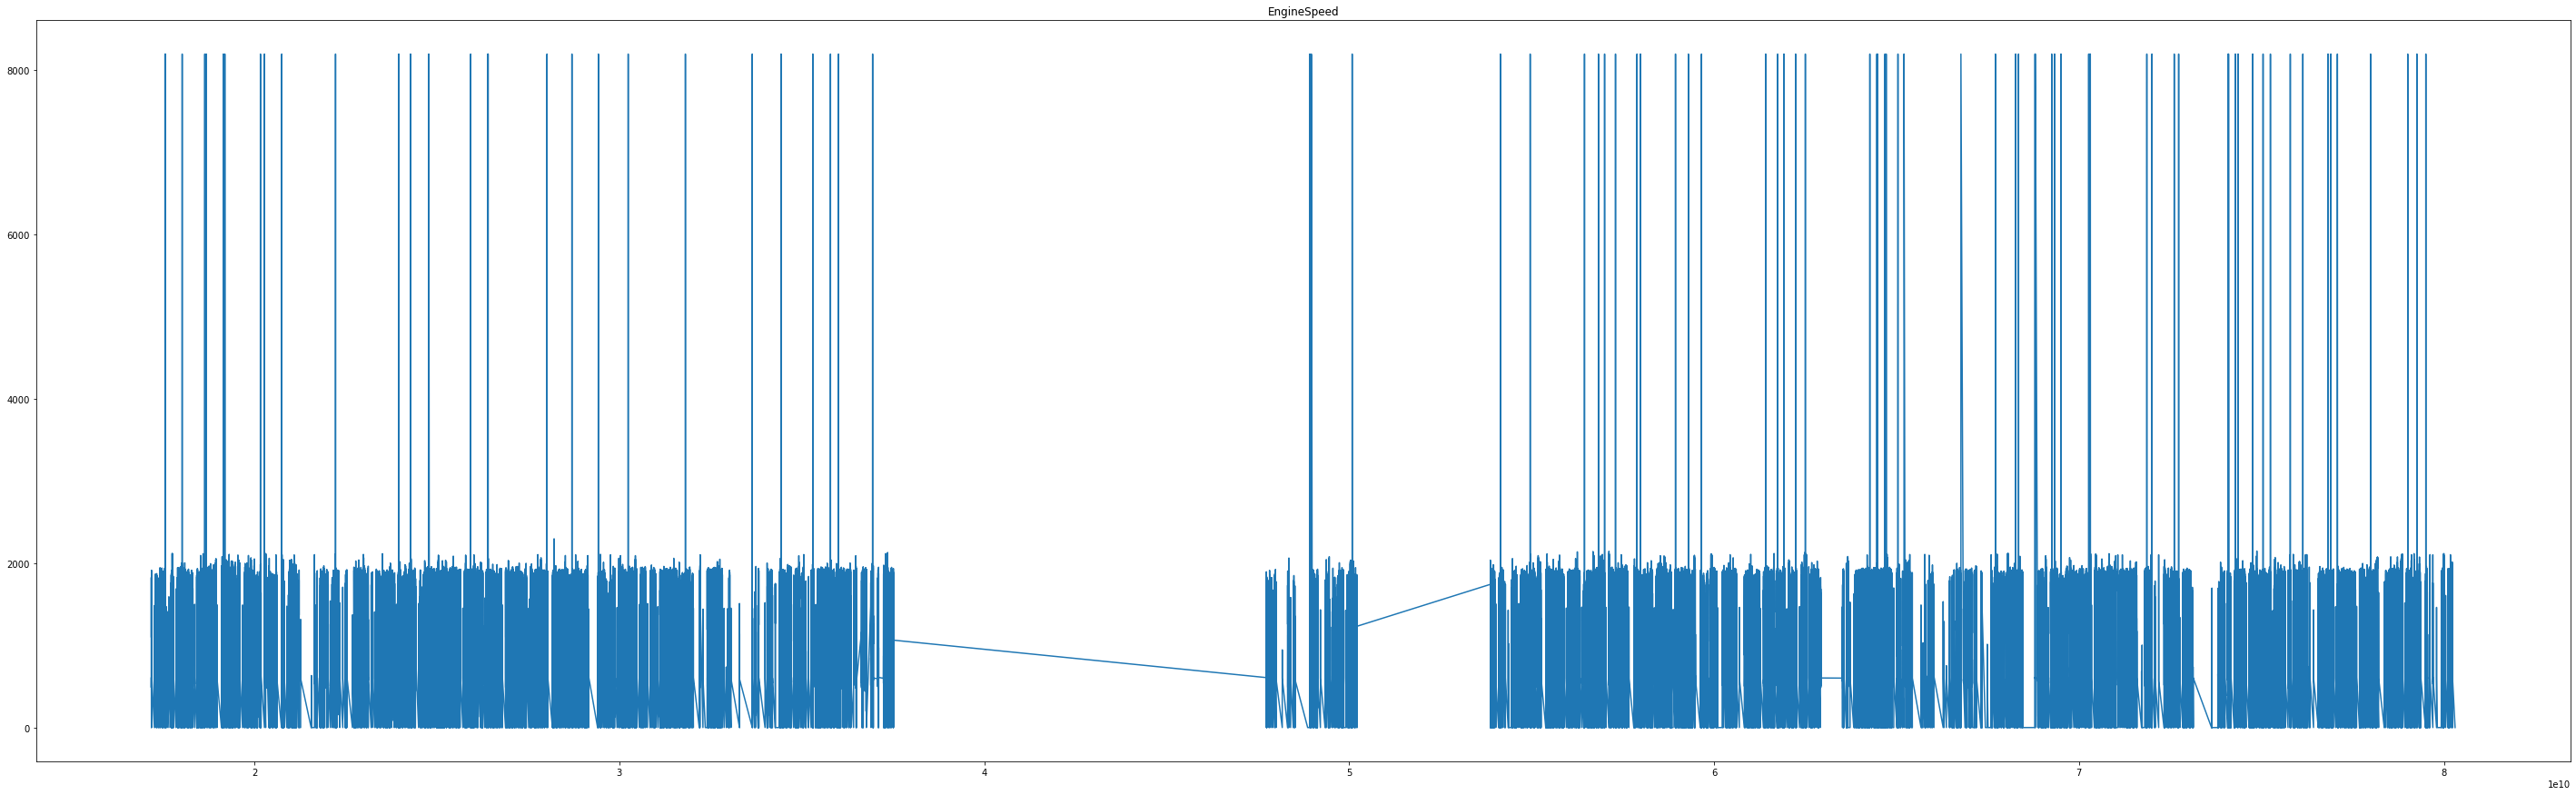

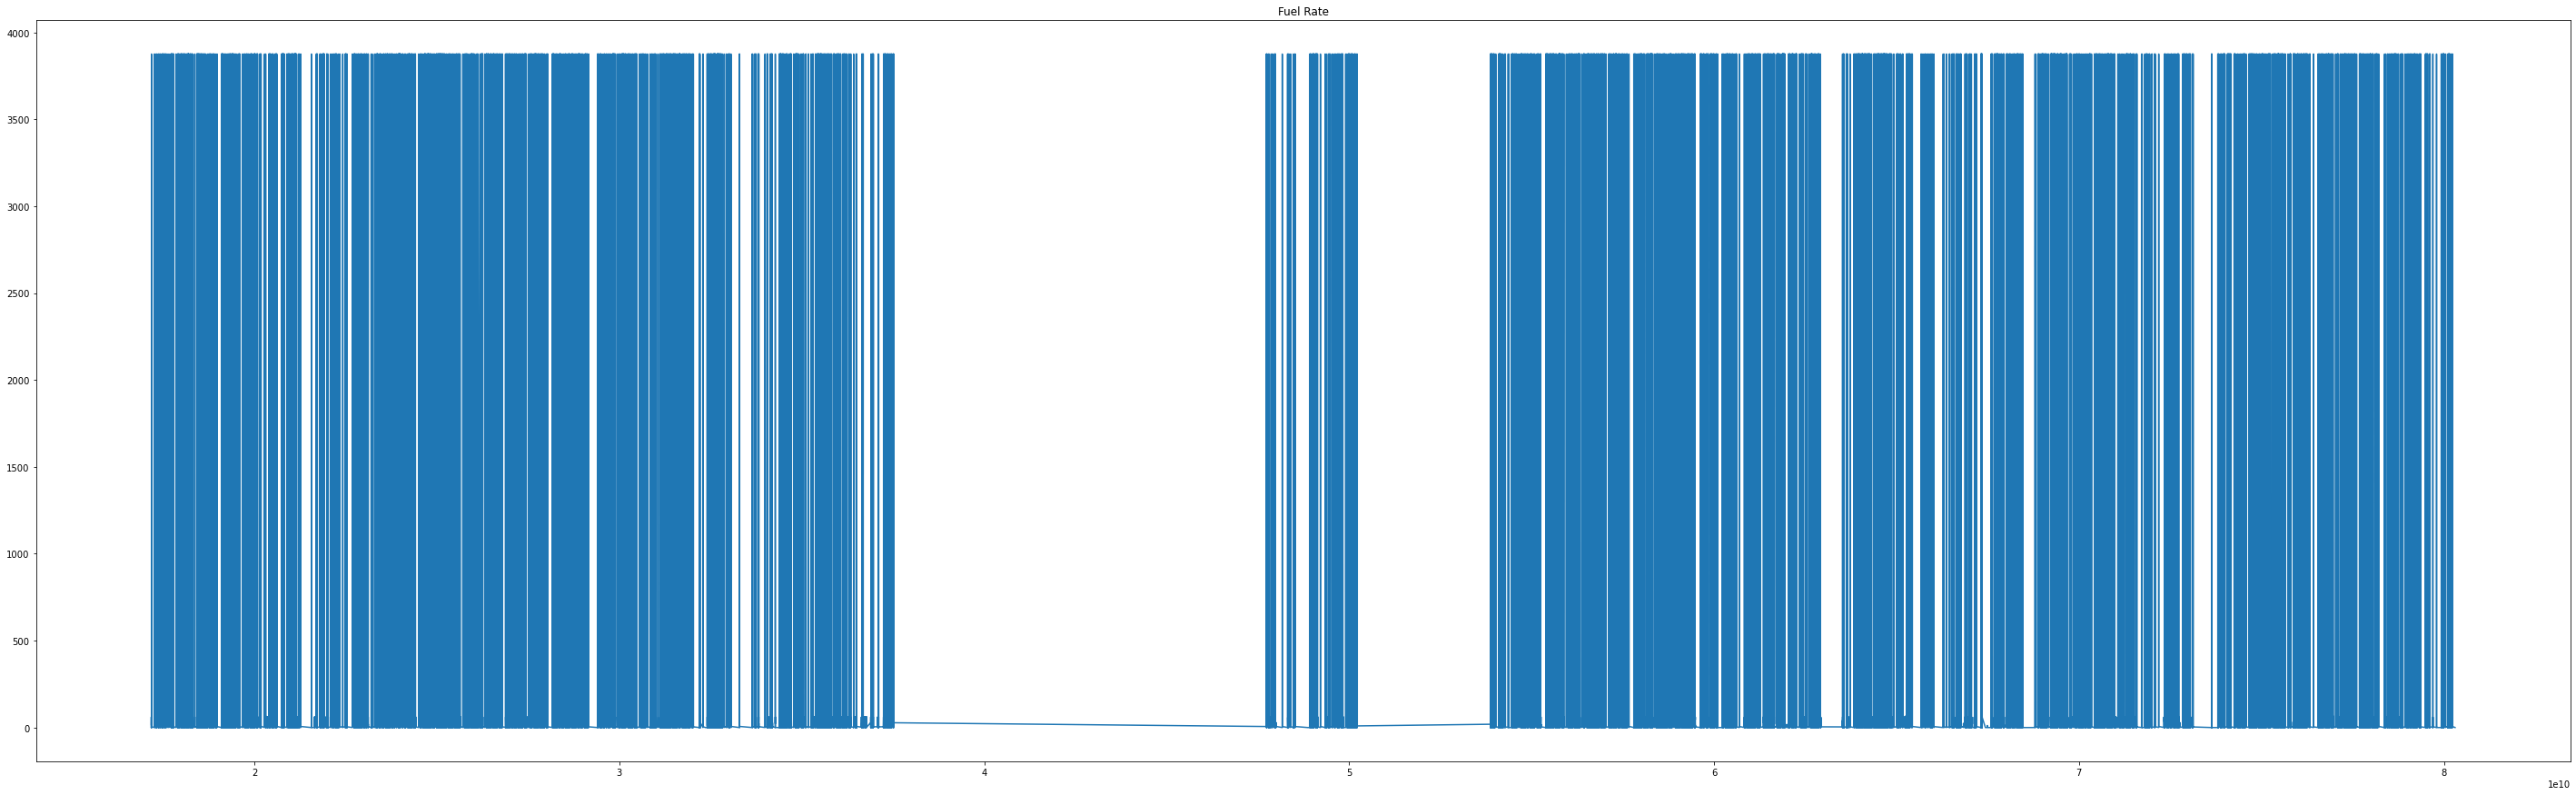

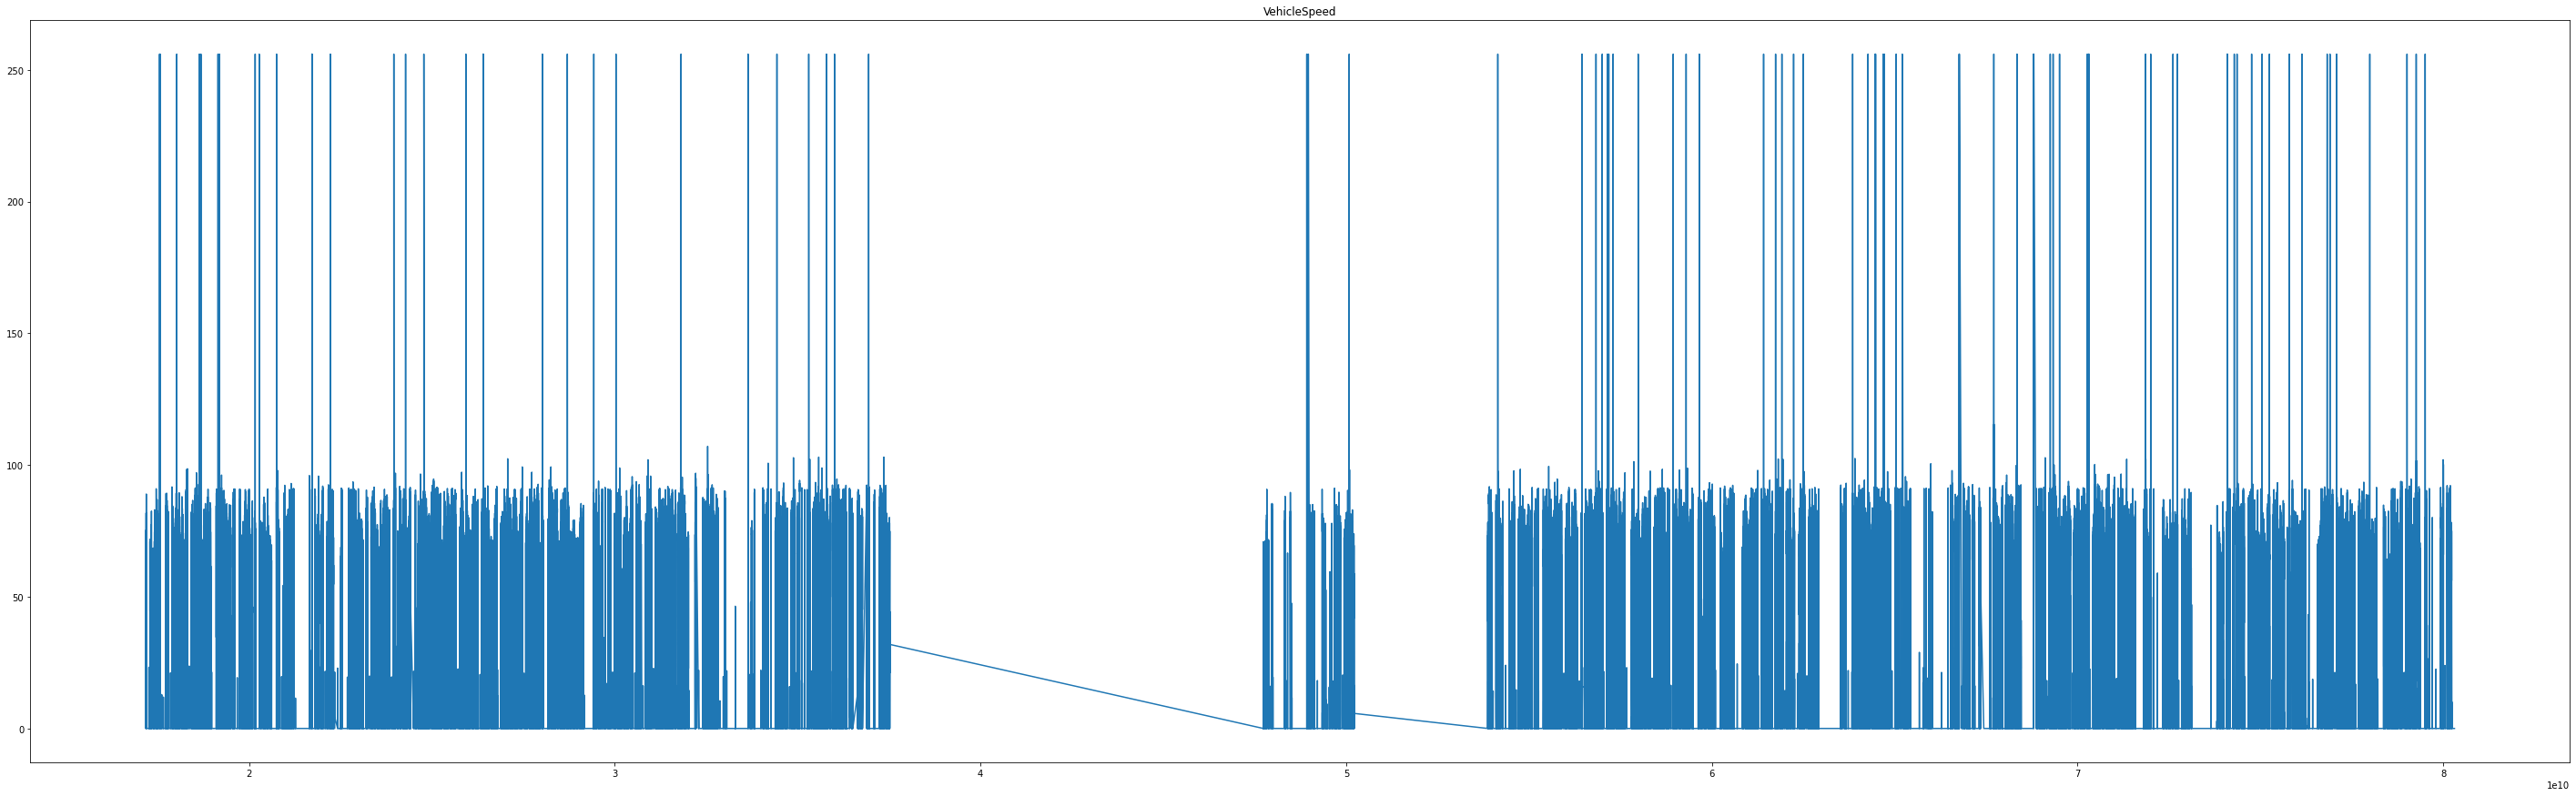

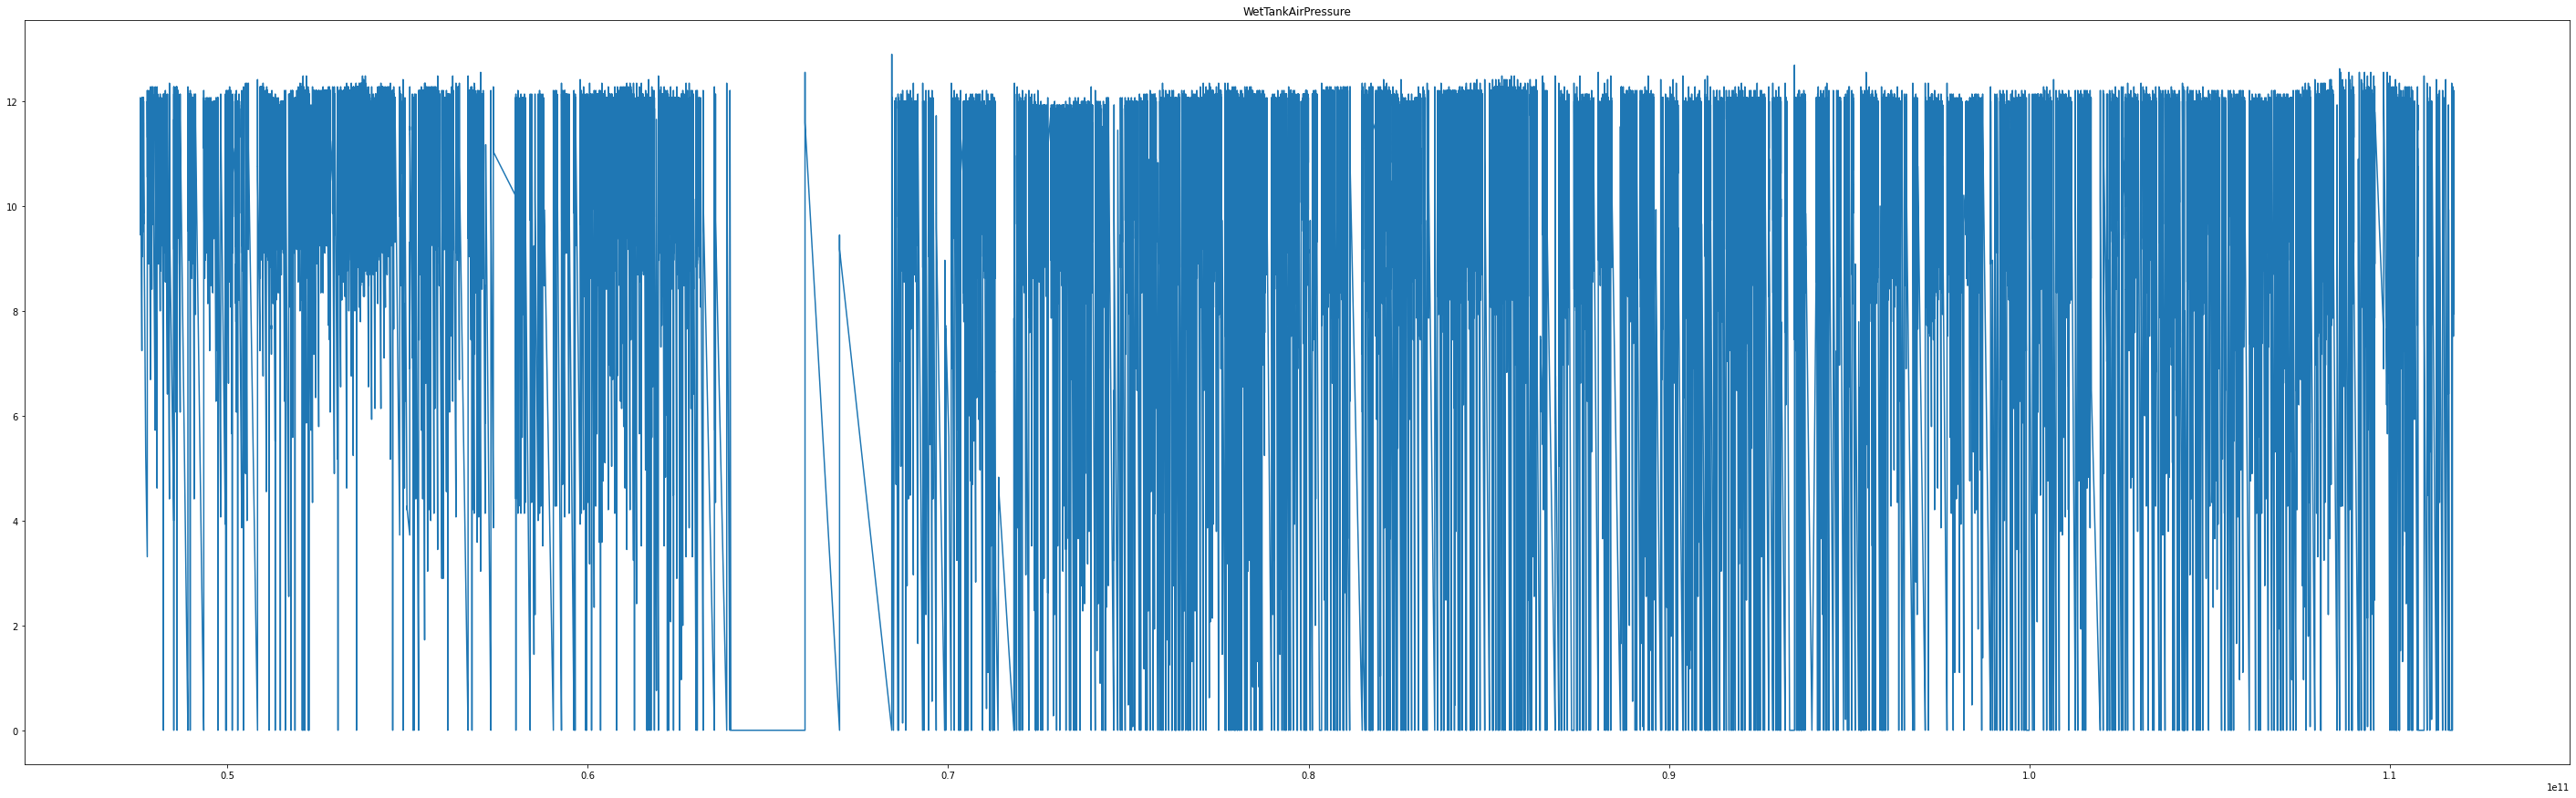

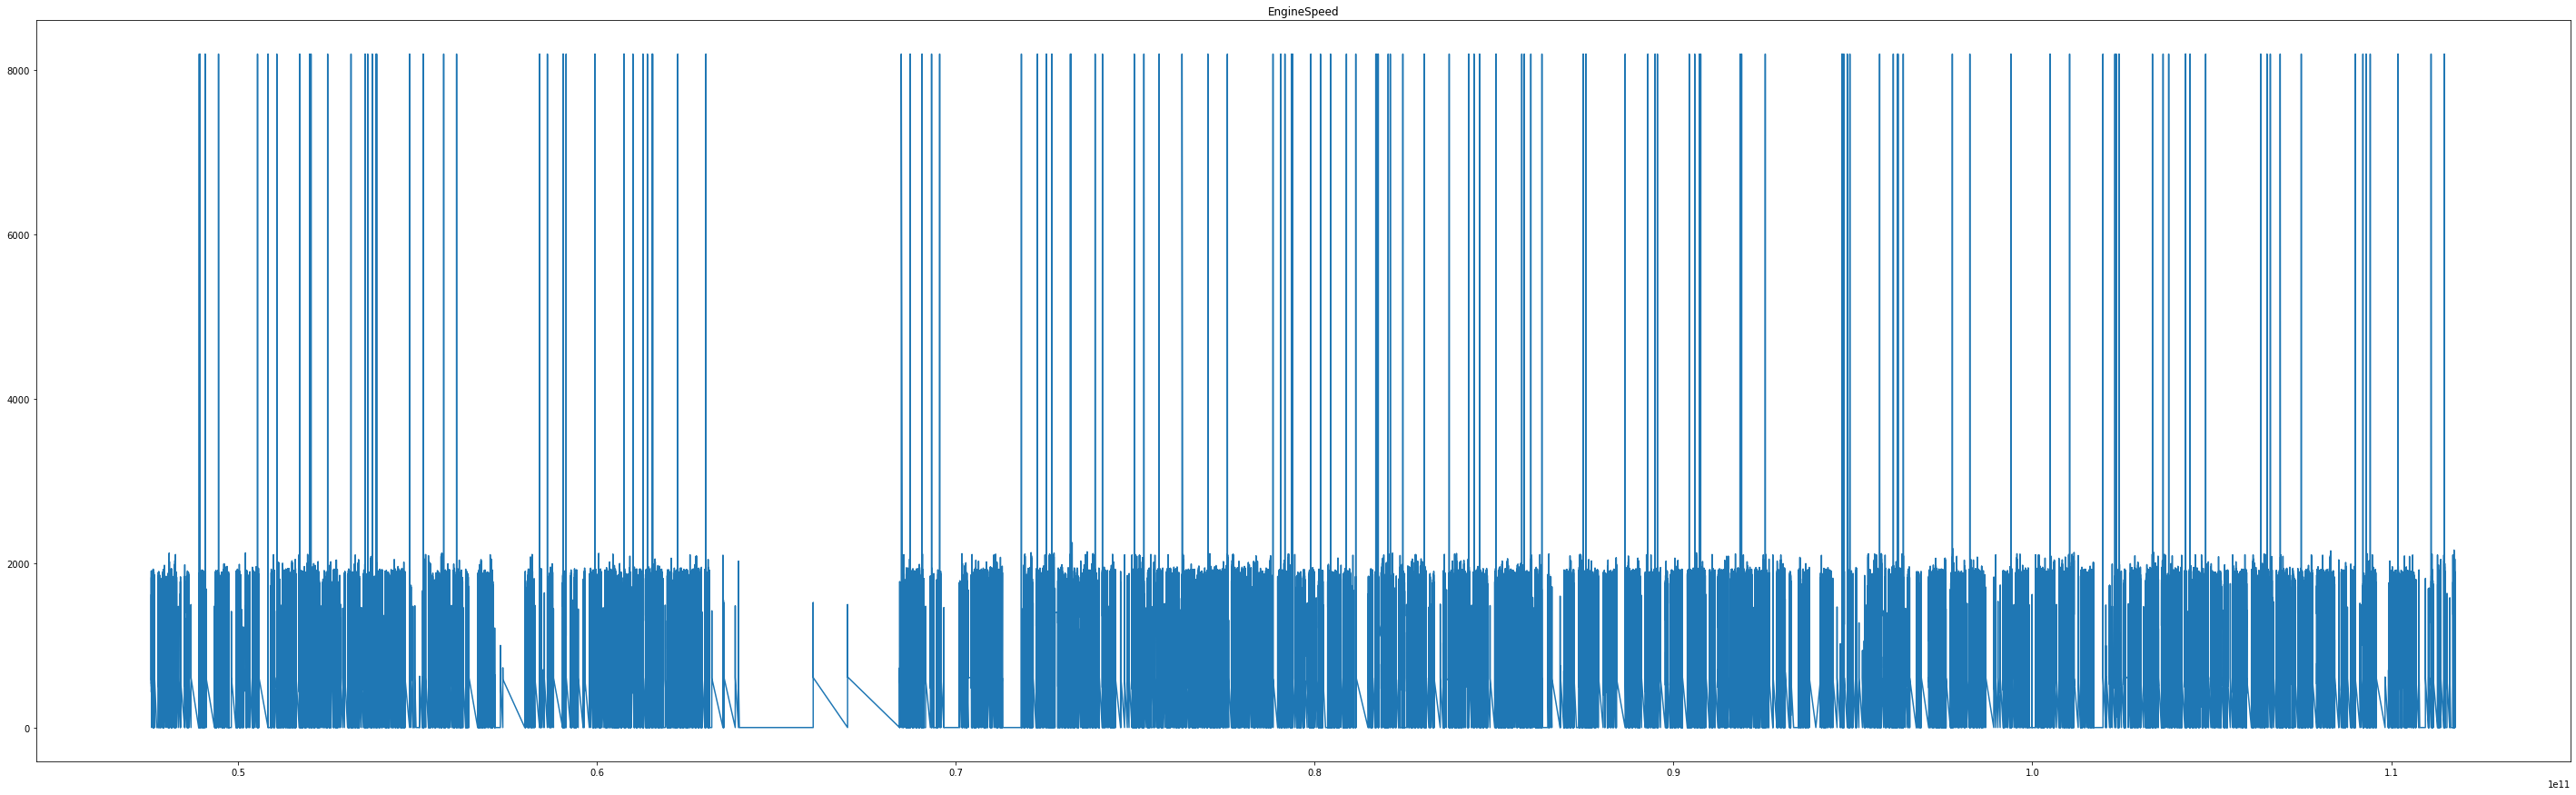

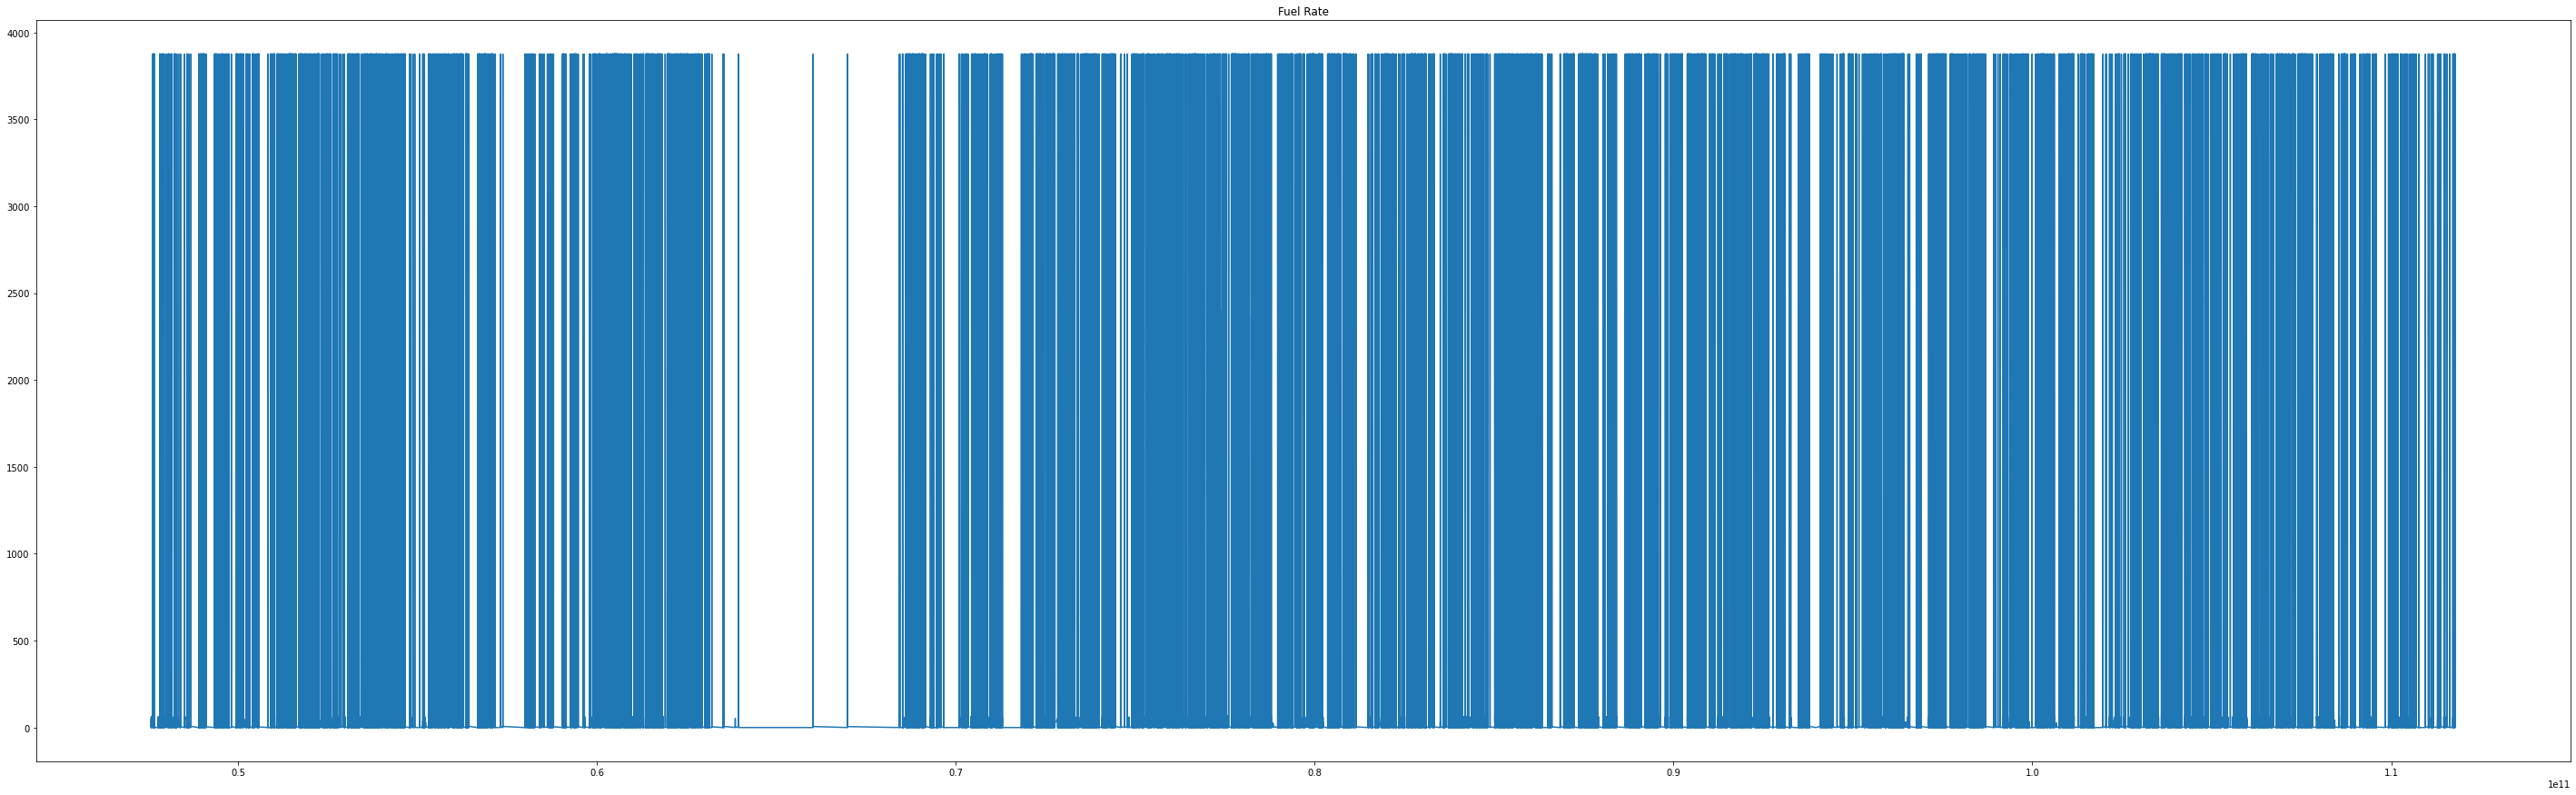

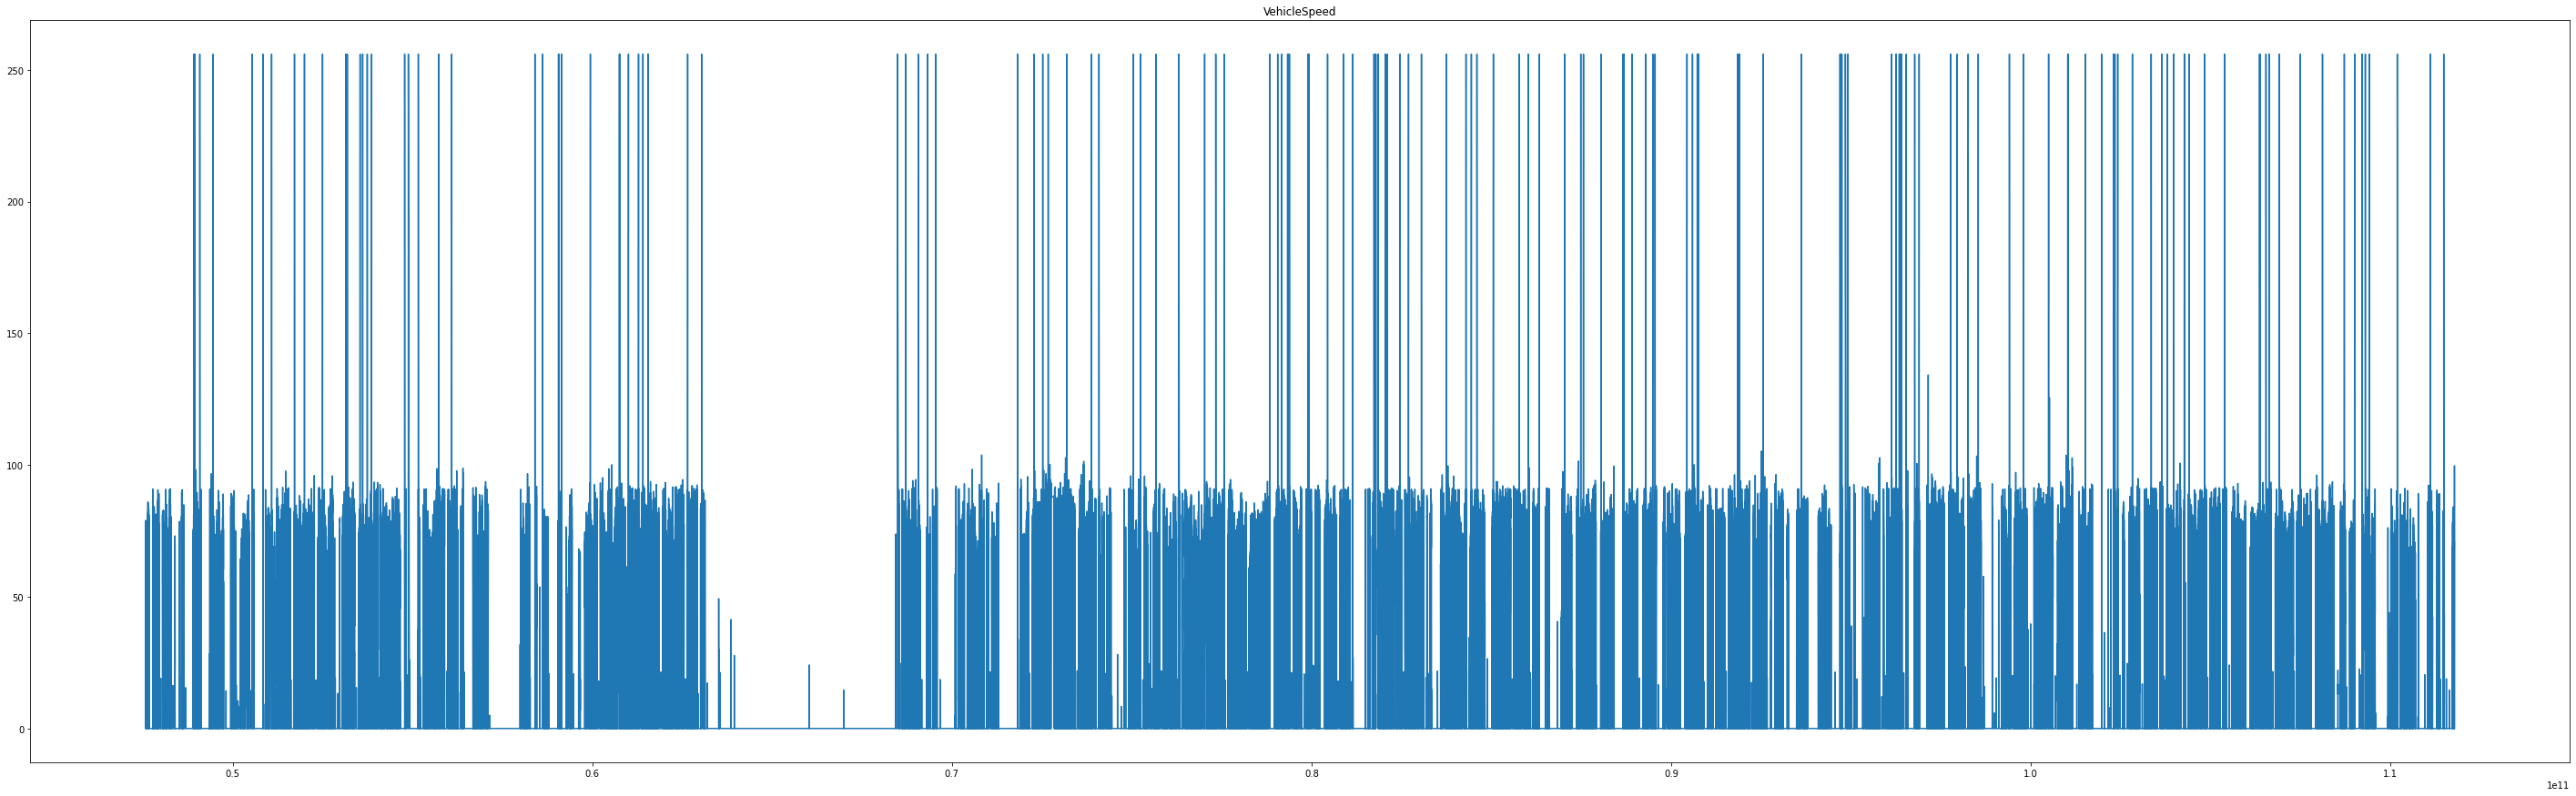

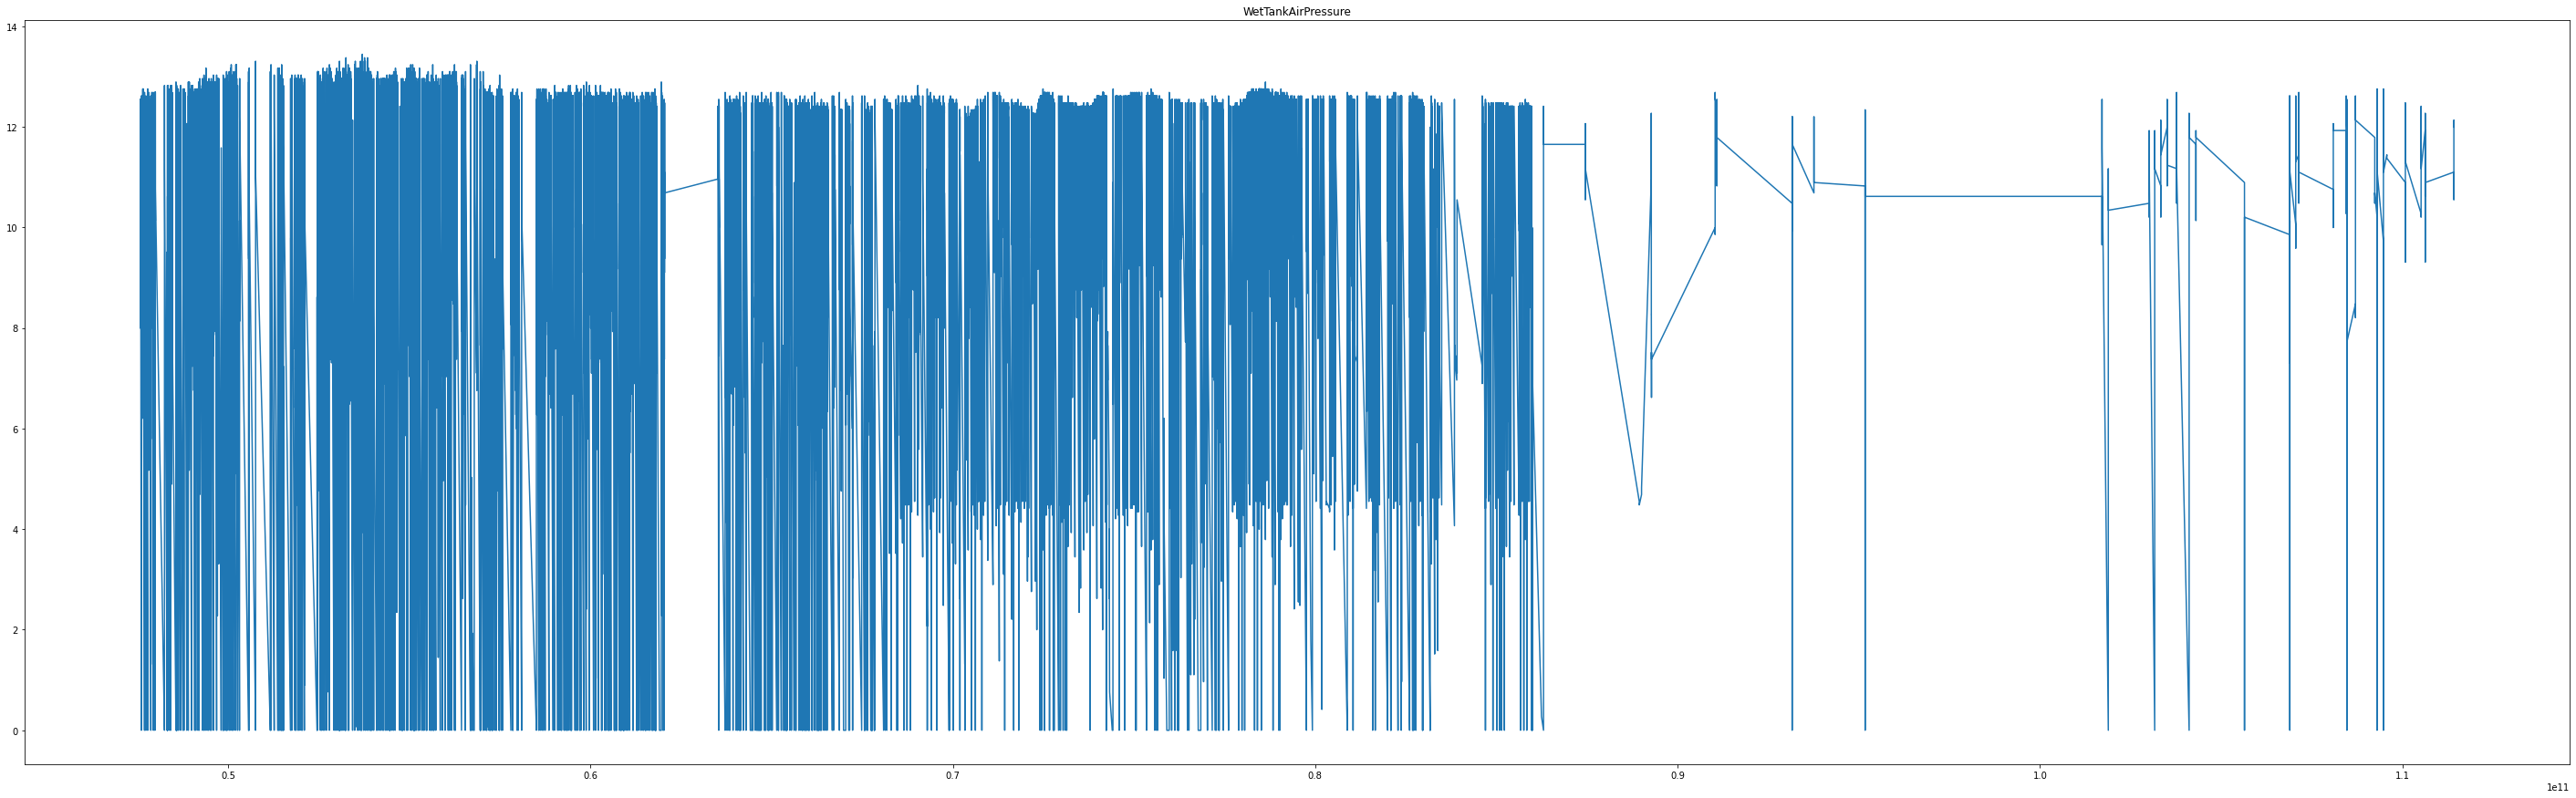

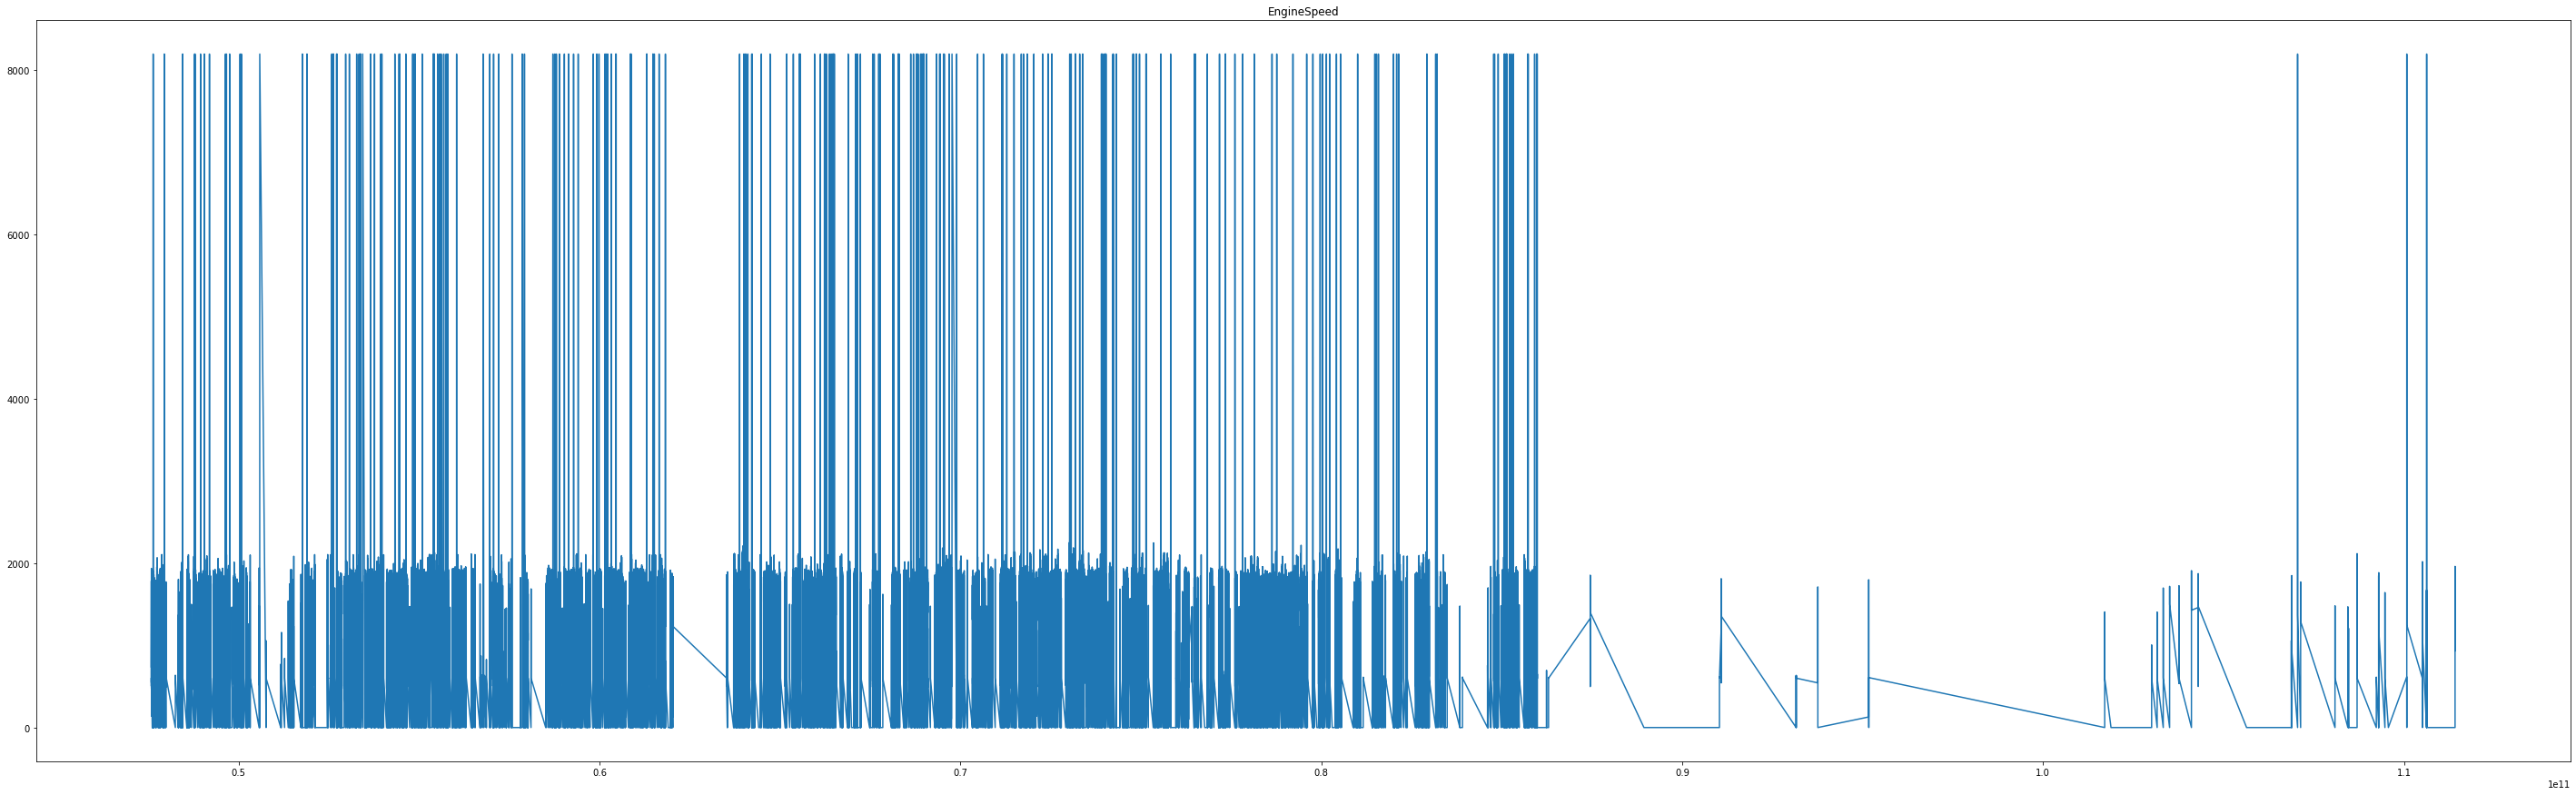

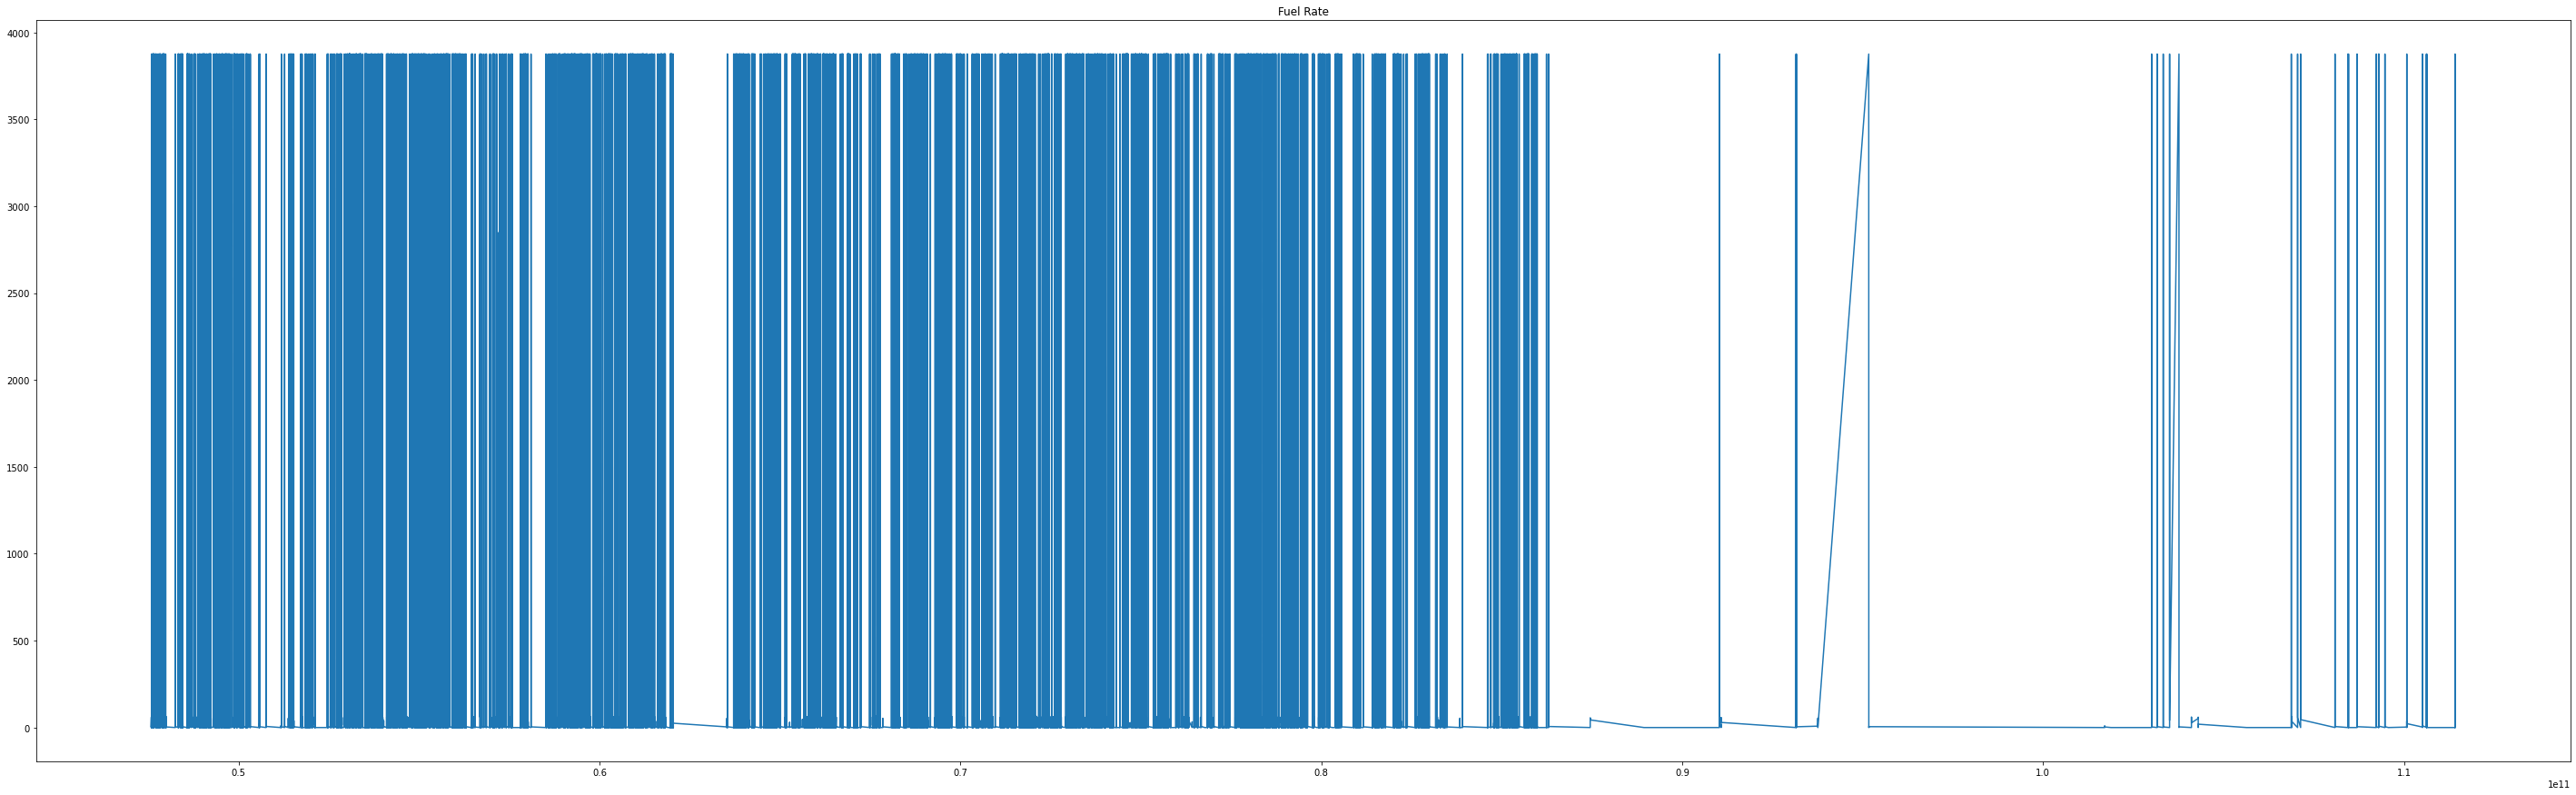

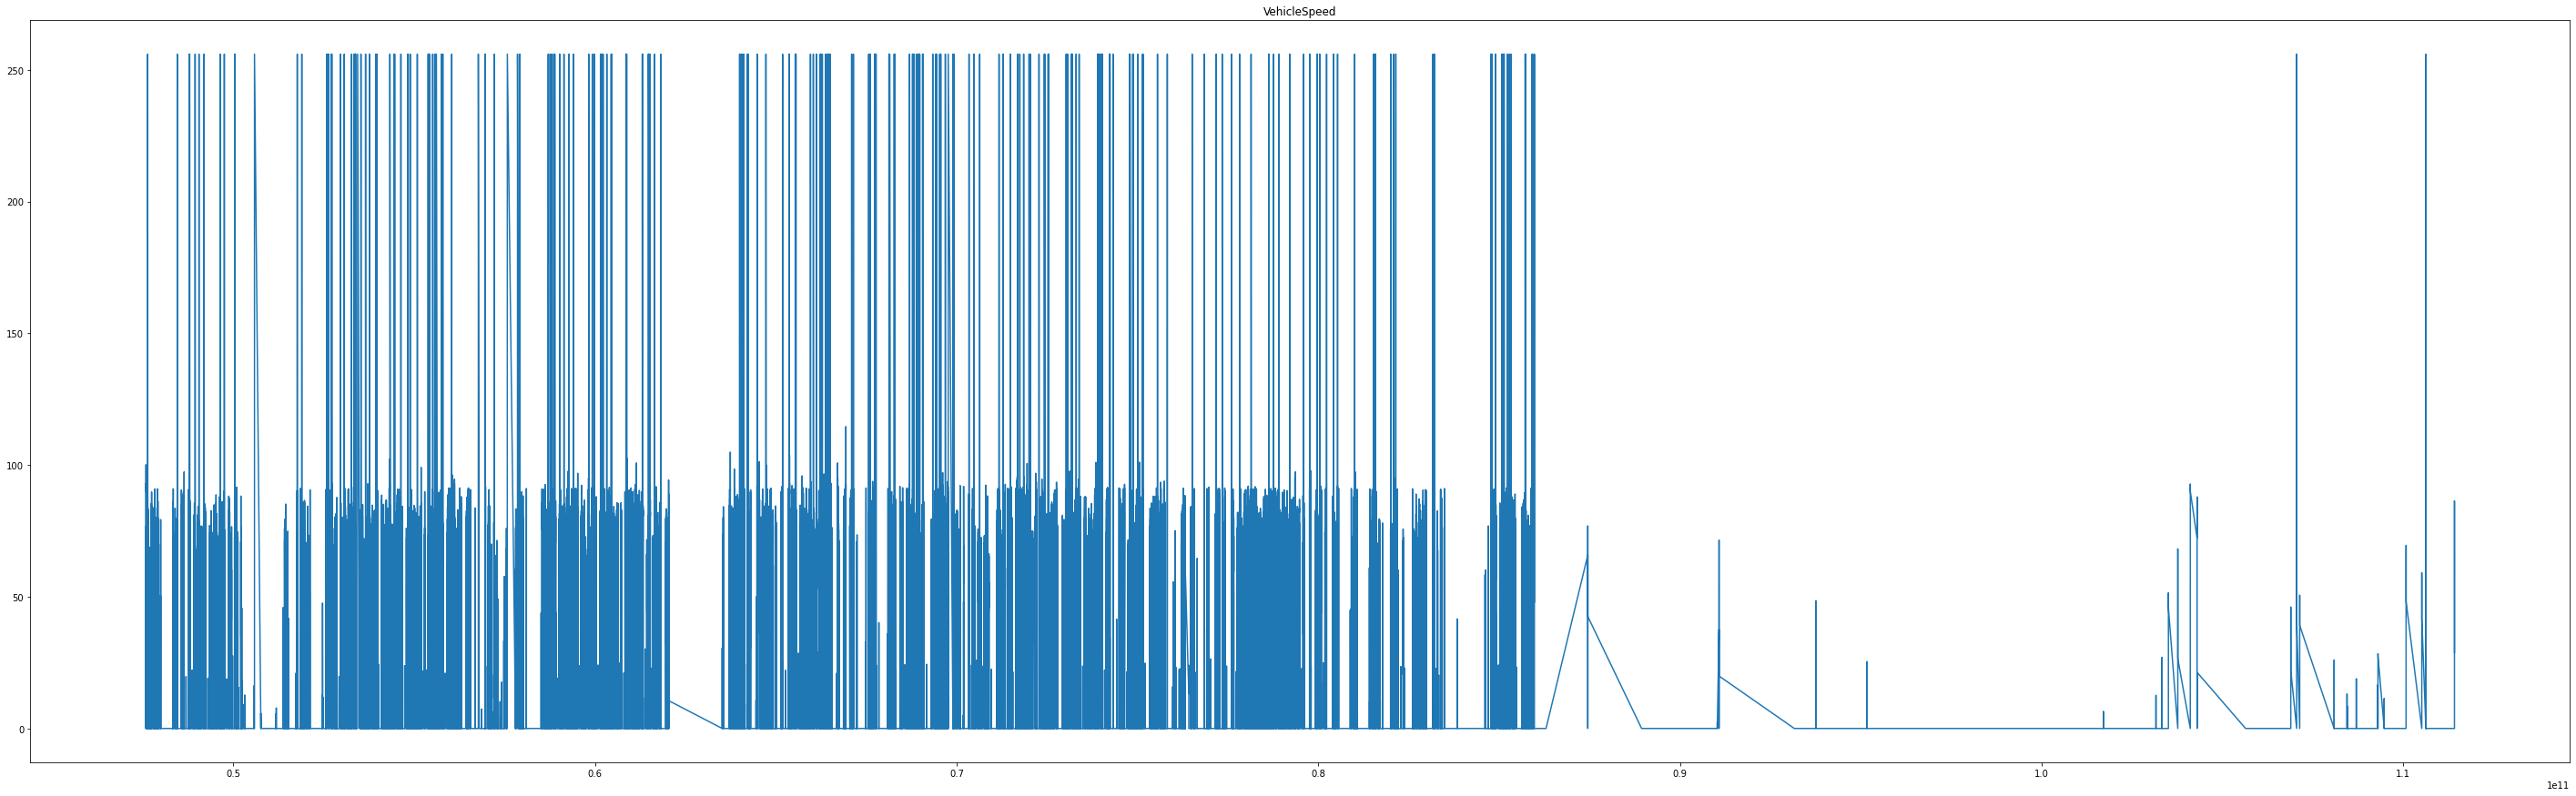

In [ ]:
for set_num in ['370', '371', '372', '375']:
    data = pickles['data-'+set_num]
    cols_to_check = ['WetTankAirPressure', 'EngineSpeed', 'Fuel Rate', 'VehicleSpeed']
    for col in cols_to_check:
        f = plt.figure(figsize=(50, 15))
        plt.plot(data['Timestamp'], data[col])
        plt.title(col)
        plt.show()